In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/ibm_hr_dataset_com_features.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 65 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Age                            1000000 non-null  int64  
 1   Attrition                      1000000 non-null  object 
 2   BusinessTravel                 1000000 non-null  object 
 3   DailyRate                      1000000 non-null  int64  
 4   Department                     1000000 non-null  object 
 5   DistanceFromHome               1000000 non-null  int64  
 6   Education                      1000000 non-null  int64  
 7   EducationField                 1000000 non-null  object 
 8   EmployeeCount                  1000000 non-null  int64  
 9   EmployeeNumber                 1000000 non-null  int64  
 10  EnvironmentSatisfaction        1000000 non-null  int64  
 11  Gender                         1000000 non-null  object 
 12  HourlyRate     

# Preparando dados modelagem

In [16]:
cols_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df_processed = df.drop(columns=cols_to_drop)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Age                            1000000 non-null  int64  
 1   Attrition                      1000000 non-null  object 
 2   BusinessTravel                 1000000 non-null  object 
 3   DailyRate                      1000000 non-null  int64  
 4   Department                     1000000 non-null  object 
 5   DistanceFromHome               1000000 non-null  int64  
 6   Education                      1000000 non-null  int64  
 7   EducationField                 1000000 non-null  object 
 8   EnvironmentSatisfaction        1000000 non-null  int64  
 9   Gender                         1000000 non-null  object 
 10  HourlyRate                     1000000 non-null  int64  
 11  JobInvolvement                 1000000 non-null  int64  
 12  JobLevel       

In [17]:
label_encoder = LabelEncoder()
df_processed['Attrition'] = label_encoder.fit_transform(df_processed['Attrition'])
numeric_features = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_processed.select_dtypes(include=['object']).columns.tolist()
numeric_features.remove('Attrition')
print(f"Features numéricas: {numeric_features}")
print(f"Features categóricas: {categorical_features}")
print(f"Target: {df_processed['Attrition'].value_counts(normalize=True)}")

Features numéricas: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'IncomePerYear', 'TotalSatisfaction', 'PromotionRate', 'LongTimeNoPromotion', 'AgeStartedWorking', 'YearsInOtherCompanies', 'CompanyChangeRate', 'AnosCargoSemPromocao', 'CargoAlto_HorasExtras', 'ScoreEstab_Carreira', 'ScoreEstabilidadeFormat', 'Burnout', 'PercAnoEmpresaAtual', 'SalarioPorTempodeCasa', 'TreinamentosPorTempodeCasa', 'TempoCargoAtualPeloNivel', 'TempSemPromoPorTempComManager', 'TempGestAtualPorTempodeCasa', 'SalarioPorKm', 'SalarioPorNivelEdu', 'SalarioPorSatisf', 'PromotionsPerYear', 'CompaniesPerYear', 'YearsInRole

## Encoding variaveris categoricas
    Nada mais que é que pivotar ou algo semelhantes
[Fonte](https://www.alura.com.br/artigos/get-dummies-vs-onehotencoder-qual-metodo-escolher?srsltid=AfmBOooISDT9teazV3qXdrefLnP1CgVy_TucfgQCg913rquY2FxTeyXF)

In [53]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    categorical_features),
    remainder='passthrough')
dados = one_hot_enc.fit_transform(df_processed)
df_encoded = pd.DataFrame(dados, columns=one_hot_enc.get_feature_names_out())

df_encoded.columns = df_encoded.columns.str.replace('onehotencoder__', '', regex=False)
df_encoded.columns = df_encoded.columns.str.replace('remainder__', '', regex=False)
df_encoded.columns = df_encoded.columns.str.strip('_')

df_encoded

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,SalarioPorSatisf,PromotionsPerYear,CompaniesPerYear,YearsInRolePercCompany,SatisfacaoGeral,SatisfacaoPeloNivel,EstavelNaEmpresa,TempoComGestorProporcao,SalarioPorSatisfacaoGeral,SalarioAjustadoPorCargo
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4877.142857,0.250000,0.280000,0.000000,2.50,0.833333,0.0,0.000000,3251.428571,2845.00
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4036.500000,0.125000,0.368421,0.444444,3.25,1.083333,0.0,0.166667,3165.882353,3363.75
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,8350.800000,0.500000,0.217391,0.000000,1.75,0.437500,0.0,0.000000,5061.090909,2783.60
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3660.300000,1.000000,0.187500,0.750000,3.50,1.166667,0.0,0.750000,2711.333333,3050.25
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,7323.500000,0.250000,0.388889,0.333333,1.75,0.437500,0.0,0.333333,5326.181818,2929.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4577.000000,0.142857,0.000000,0.571429,3.25,0.812500,1.0,0.571429,3230.823529,2746.20
999996,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4801.125000,0.333333,0.210526,0.666667,3.00,1.000000,0.0,0.200000,3200.750000,3200.75
999997,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,4003.666667,0.142857,0.235294,0.200000,3.00,1.000000,0.0,0.100000,3002.750000,3002.75
999998,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5081.625000,0.200000,0.125000,0.000000,2.75,0.916667,0.0,0.000000,3613.600000,3387.75


In [19]:
import pickle
with open('modelo_onehotenc.pkl', 'wb') as file:
    pickle.dump(one_hot_enc, file)

## Processo de dummies para teste

In [ ]:
#df_encoded = pd.get_dummies(df_processed, columns=categorical_features, prefix=categorical_features) #dummies encoding
#df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 80 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   Age                                1000000 non-null  int64  
 1   Attrition                          1000000 non-null  int64  
 2   DailyRate                          1000000 non-null  int64  
 3   DistanceFromHome                   1000000 non-null  int64  
 4   Education                          1000000 non-null  int64  
 5   EnvironmentSatisfaction            1000000 non-null  int64  
 6   HourlyRate                         1000000 non-null  int64  
 7   JobInvolvement                     1000000 non-null  int64  
 8   JobLevel                           1000000 non-null  int64  
 9   JobSatisfaction                    1000000 non-null  int64  
 10  MonthlyIncome                      1000000 non-null  int64  
 11  MonthlyRate              

## Divisão de treino e teste

In [54]:
X = df_encoded.drop('Attrition', axis=1) #features
y = df_encoded['Attrition'] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) #usando o stratify para manter a proporção de classes no conjunto de teste devido ao desbalanceamento
print(f"\nTamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")
print(f"Total de features: {X_train.shape[1]}")
print(f"Proporção Attrition no treino: {y_train.mean():.2%}")
print(f"Proporção Attrition no teste: {y_test.mean():.2%}")


Tamanho do conjunto de treino: (800000, 79)
Tamanho do conjunto de teste: (200000, 79)
Total de features: 79
Proporção Attrition no treino: 17.88%
Proporção Attrition no teste: 17.88%


### Oversampling

#### SMOTE
    Cria exemplos sintéticos da classe minoritária combinando exemplos reais.

In [21]:
import os
os.environ["SCIPY_ARRAY_API"] = "1"

In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
y_train.value_counts(), y_train_over.value_counts()

(Attrition
 0.0    656927
 1.0    143073
 Name: count, dtype: int64,
 Attrition
 0.0    656927
 1.0    656927
 Name: count, dtype: int64)

In [56]:
print(f"Proporção Attrition no treino Over SMOTE: {y_train_over.mean():.2%}")
print(f"Proporção Attrition no teste: {y_test.mean():.2%}")

Proporção Attrition no treino Over SMOTE: 50.00%
Proporção Attrition no teste: 17.88%


#### ADASYN
    Parecido com SMOTE, mas gera mais exemplos em áreas de difícil classificação.

In [57]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
y_train.value_counts(),
y_train_adasyn.value_counts()

Attrition
1.0    669299
0.0    656927
Name: count, dtype: int64

In [58]:
print(f"Proporção Attrition no treino Over ADASYN: {y_train_adasyn.mean():.2%}")
print(f"Proporção Attrition no teste: {y_test.mean():.2%}")

Proporção Attrition no treino Over ADASYN: 50.47%
Proporção Attrition no teste: 17.88%


### Undersampling

#### RandomUnderSampler
    Remove exemplos da classe majoritária.

In [59]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
print(y_train.value_counts(), y_train_under.value_counts())

Attrition
0.0    656927
1.0    143073
Name: count, dtype: int64 Attrition
0.0    143073
1.0    143073
Name: count, dtype: int64


In [60]:
print(f"Proporção Attrition no treino under: {y_train_under.mean():.2%}")
print(f"Proporção Attrition no teste: {y_test.mean():.2%}")

Proporção Attrition no treino under: 50.00%
Proporção Attrition no teste: 17.88%


#### Tomek Links, NearMiss
    Métodos mais inteligentes para escolher quais exemplos da maioria remover.


## Feature selection

### Baixa variancia

In [61]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
X_train_var = selector.fit_transform(X_train)
# Recupera os nomes das features mantidas
features_var = X_train.columns[selector.get_support()]
print("Top features após VarianceThreshold:")
print(features_var[:20])

Top features após VarianceThreshold:
Index(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive'],
      dtype='object')


### Correlação
    Faz uma correlação entre elas e tira as colunas que são mais reduntantes

In [62]:
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_cols = [column for column in upper.columns if any(upper[column] > 0.8)]
X_train_corr = X_train.drop(drop_cols, axis=1)
print("Features após remoção de correlação alta:")
print(X_train_corr.columns)

Features após remoção de correlação alta:
Index(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyRate', 'NumCompaniesWorked', 'Perce

In [63]:
len(X_train_corr.columns)
len(X_train.columns)
print(len(X_train.columns) - len(X_train_corr.columns))

14


### SelectKBest
    Usa teste estatístico (ANOVA, chi2) para escolher as variáveis mais relacionadas à target.

In [64]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=20)
X_train_best = selector.fit_transform(X_train, y_train)

features_best = X_train.columns[selector.get_support()]
print(features_best[:20])

Index(['MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes', 'Age',
       'Education', 'EnvironmentSatisfaction', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany', 'TotalSatisfaction',
       'PromotionRate', 'AnosCargoSemPromocao', 'CargoAlto_HorasExtras',
       'Burnout', 'SatisfacaoGeral', 'SalarioPorSatisfacaoGeral'],
      dtype='object')


### Features em comum entre todos os features selections

In [65]:
print(f'features em comum em todos os features selections: \
      \n {set(features_best) & set(features_var) & set(X_train_corr.columns)}')

features em comum em todos os features selections:       
 {'TotalSatisfaction', 'OverTime_No', 'WorkLifeBalance', 'Burnout', 'StockOptionLevel', 'JobLevel', 'AnosCargoSemPromocao', 'PromotionRate', 'Age', 'JobSatisfaction', 'YearsAtCompany', 'EnvironmentSatisfaction', 'MaritalStatus_Single', 'CargoAlto_HorasExtras', 'Education'}


### Recursive Feature Elimination (RFE)
    Treina um modelo e vai retirando a menos importante, repetindo até chegar no número desejado.

## Normalização das features

### Analise de normalidade das features

In [66]:
import pandas as pd
from scipy.stats import shapiro

resultados = []

for col in numeric_features:
    stat, p = shapiro(df[col].dropna())
    normal = 'Sim' if p >= 0.05 else 'Não'
    resultados.append({'feature': col, 'p_value': p, 'normal': normal})

df_normalidade = pd.DataFrame(resultados)
df_normalidade

,feature,p_value,normal
0,Age,2.403655e-81,Não
1,DailyRate,3.127623e-129,Não
2,DistanceFromHome,3.188439e-169,Não
3,Education,8.575938e-153,Não
4,EnvironmentSatisfaction,3.633222e-167,Não
5,HourlyRate,1.233381e-129,Não
6,JobInvolvement,4.930583e-173,Não
7,JobLevel,4.025323e-172,Não
8,JobSatisfaction,3.172885e-167,Não
9,MonthlyIncome,6.087930e-59,Não


In [67]:
df_normalidade['normal'].value_counts()

normal
Não    53
Name: count, dtype: int64

### Sobre os graficos
* shapiro
    * Teste estatístico para verificar se os dados vêm de uma distribuição normal.
    * Retorna um p-value.
        * Se p < 0.05: rejeita normalidade (dados não são normais).
        * Se p ≥ 0.05: não rejeita normalidade (dados podem ser normais).
* KDE (Kernel Density Estimation)
     * Linha suave que estima a “densidade” da distribuição dos dados
     * Um KDE em formato de sino sugere normalidade.
     * Serve para visualizar “degraus”, caudas, etc. com mais clareza que o histograma.
* Q-Q Plot (Quantile-Quantile Plot)
     * Gráfico que compara os quantis dos seus dados com os quantis esperados de uma normal.
     * Se os pontos seguem a linha reta: distribuição normal.
     * Se há desvios sistemáticos: caudas pesadas, assimetria, ou não normal.
     * Ótimo para ver se só as extremidades (“caudas”) quebram a normalidade.


Age: p-value = 0.00000 (Não normal)
Age: p-value = 0.00000 (Não normal)


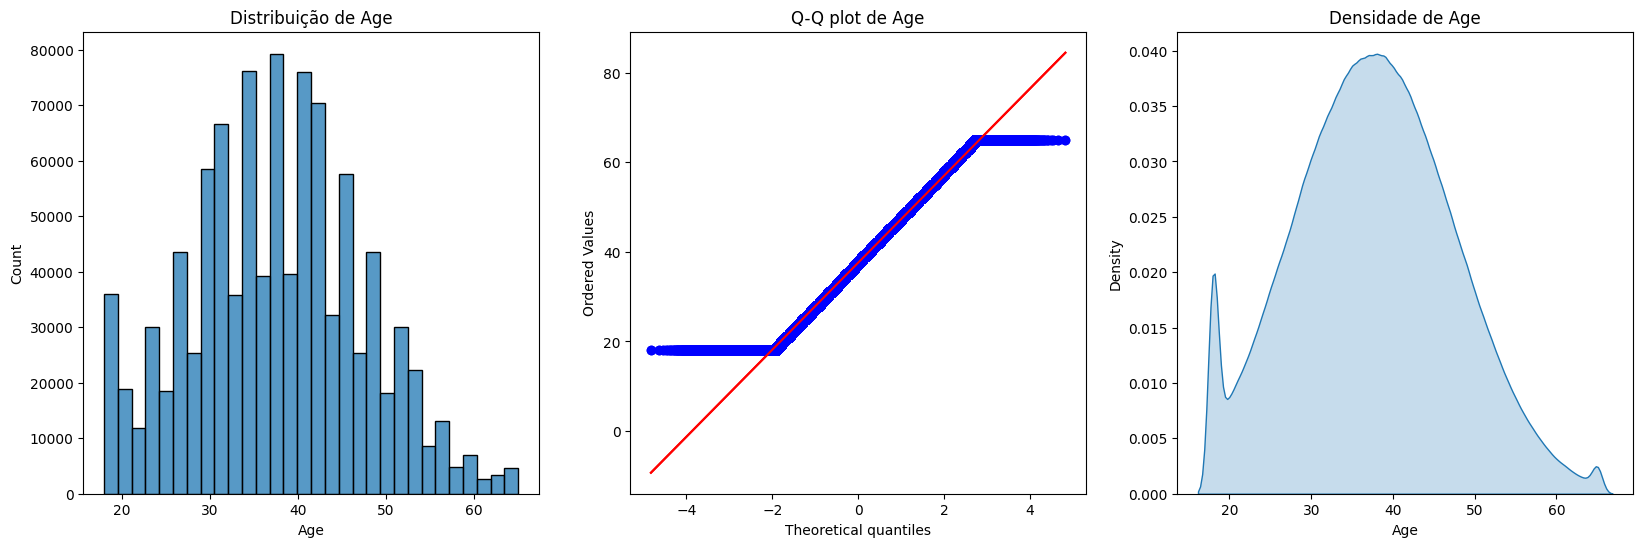

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import scipy.stats as stats


fig, axes = plt.subplots(1, 3, figsize=(20, 6))
col = 'Age'

sns.histplot(df[col].dropna(), bins=30, ax=axes[0])
axes[0].set_title(f'Distribuição de {col}')

stats.probplot(df[col].dropna(), dist="norm", plot=axes[1])
axes[1].set_title(f'Q-Q plot de {col}')


stat, p = shapiro(df[col].dropna())
print(f"{col}: p-value = {p:.5f} {'(Normal)' if p >= 0.05 else '(Não normal)'}")


stats.probplot(df[col].dropna(), dist="norm", plot=axes[1])
axes[1].set_title(f'Q-Q plot de {col}')


stat, p = shapiro(df[col].dropna())
print(f"{col}: p-value = {p:.5f} {'(Normal)' if p >= 0.05 else '(Não normal)'}")

sns.kdeplot(df[col].dropna(), shade=True, ax=axes[2])
axes[2].set_title(f'Densidade de {col}')
plt.show()


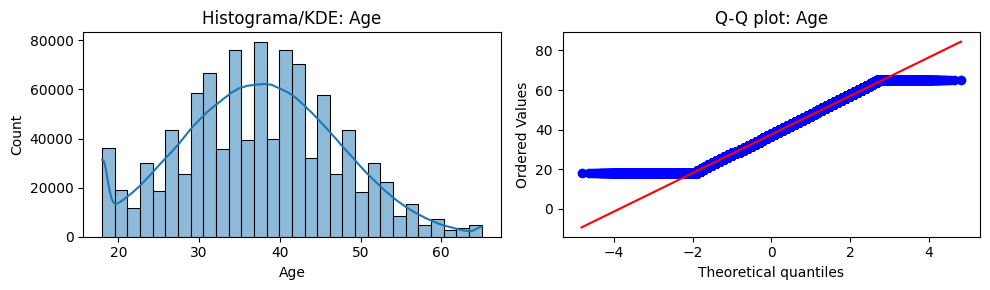

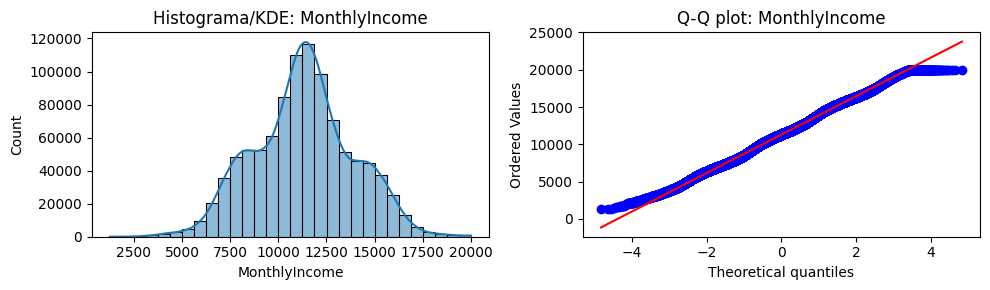

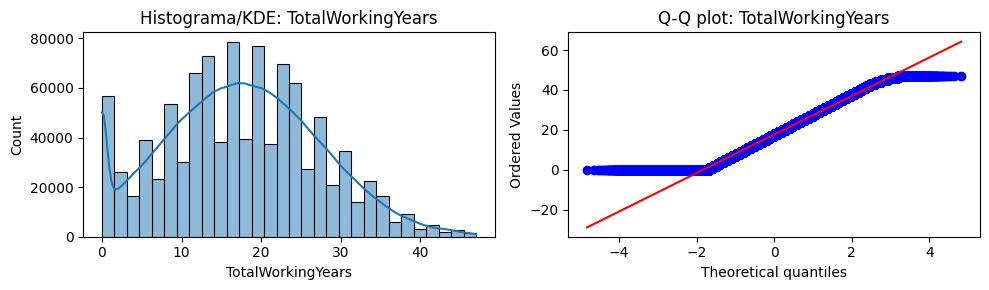

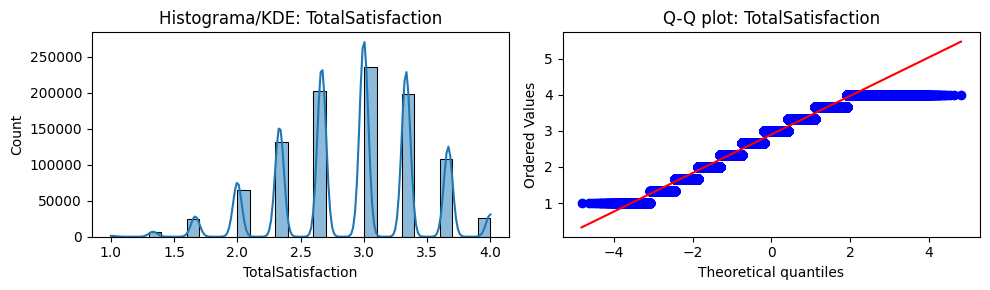

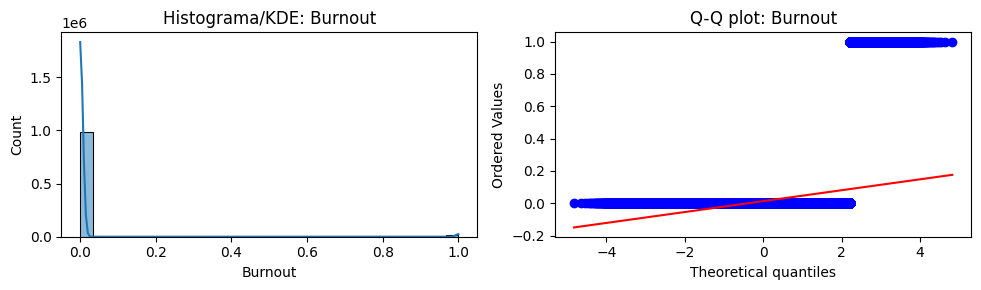

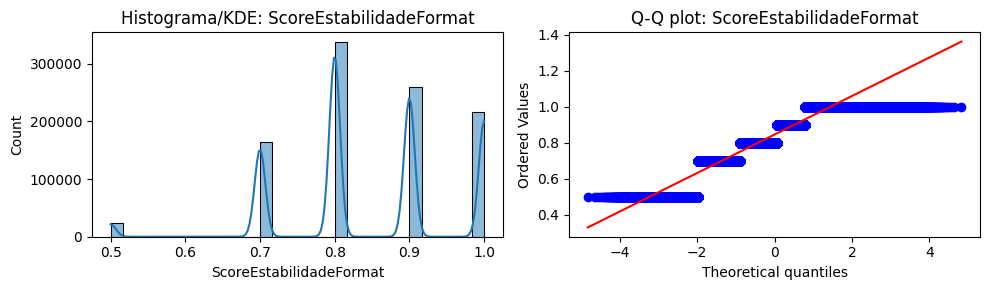

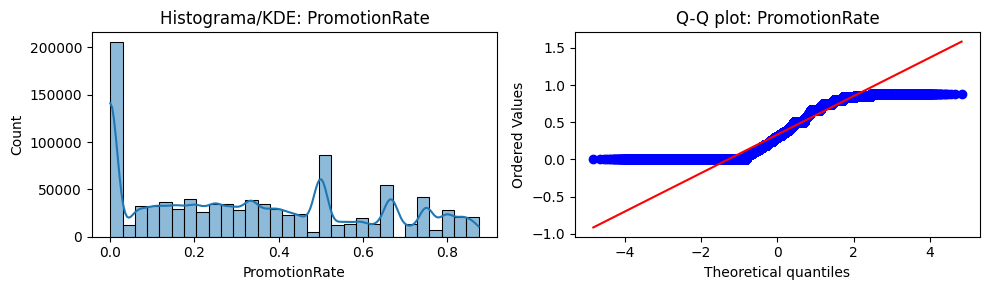

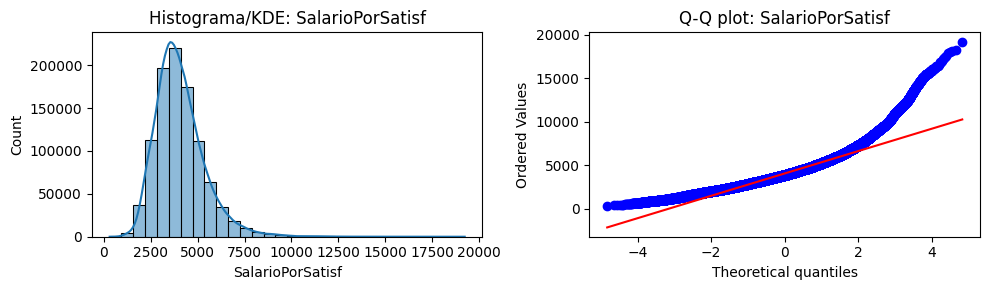

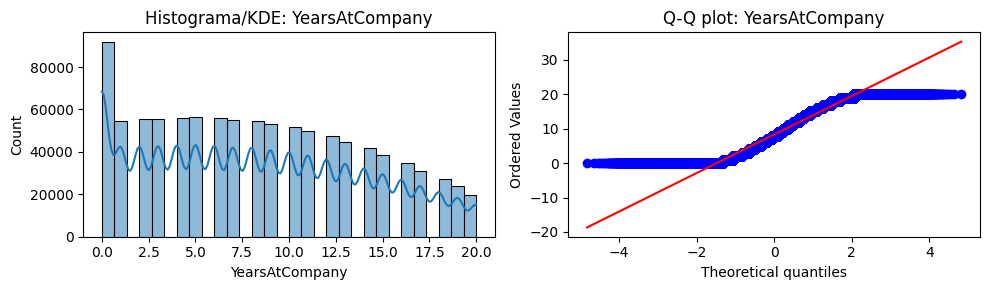

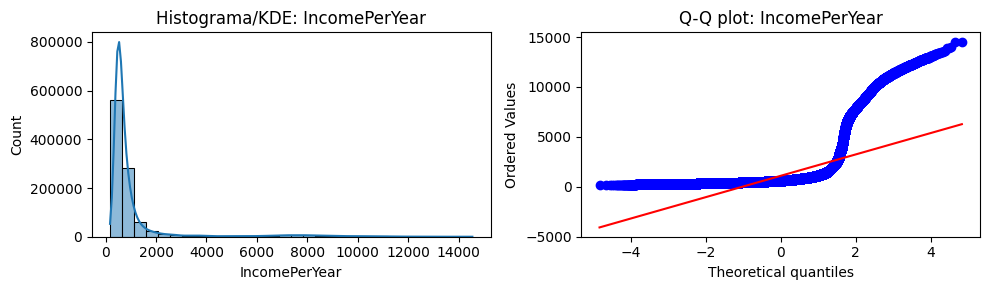

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

top10 = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'TotalSatisfaction', 'Burnout', 'ScoreEstabilidadeFormat', 'PromotionRate', 'SalarioPorSatisf', 'YearsAtCompany', 'IncomePerYear'] 

for col in top10:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f'Histograma/KDE: {col}')
    stats.probplot(df[col].dropna(), dist="norm", plot=axes[1])
    axes[1].set_title(f'Q-Q plot: {col}')
    plt.tight_layout()
    plt.show()

### StandardScaler
    Para dados que são normal curva de sino (guassiana) ou que são < 0.05

In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.35793764, -0.53630497,  0.70246676, ..., -0.39690247,
         1.17435583, -0.036976  ],
       [-0.35793764, -0.53630497,  0.70246676, ..., -1.08995166,
         0.11979596,  1.0168484 ],
       [ 3.21147531, -0.53630497, -1.63617395, ...,  0.62228752,
         2.1011505 ,  1.5970791 ],
       ...,
       [-0.35793764, -0.53630497,  0.70246676, ...,  2.0287697 ,
         1.19822955,  0.01025397],
       [-0.35793764,  0.68826054, -0.366021  , ...,  0.49925471,
        -0.09340784, -0.0640787 ],
       [ 1.59314523, -0.53630497, -0.57586161, ...,  0.49126453,
        -0.10476382, -0.34753392]], shape=(1313854, 79))

### Normalizer
    Para dados não é normal
    Normalize age reescalando os dados por exemplos/linhas e não por colunas, ou seja, o Normalizer levará em contas os atributos idade, salário e bonus e reescalar os valores com base nesses três valores

In [87]:
from sklearn.preprocessing import Normalizer
X_train_normalize = Normalizer().fit_transform(X_train_over)
X_test_normalize = Normalizer().fit_transform(X_test)
X_train_normalize

array([[0.00000000e+00, 0.00000000e+00, 3.88004718e-05, ...,
        6.46674530e-06, 1.45993242e-01, 1.09494931e-01],
       [0.00000000e+00, 0.00000000e+00, 6.46847619e-05, ...,
        0.00000000e+00, 1.92258332e-01, 2.04274478e-01],
       [3.70575290e-05, 0.00000000e+00, 0.00000000e+00, ...,
        1.52589825e-05, 1.65177759e-01, 1.23883320e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 3.27599899e-05, ...,
        2.45699924e-05, 1.23851137e-01, 9.29420156e-02],
       [0.00000000e+00, 2.96280538e-05, 3.52200196e-05, ...,
        2.47834673e-05, 1.82380745e-01, 1.82440886e-01],
       [2.72112580e-05, 0.00000000e+00, 2.25704392e-05, ...,
        1.89297832e-05, 1.39583871e-01, 1.35554671e-01]],
      shape=(1313854, 79))

### MinMax Scaler
    para dados não normais
    o cálculo da reescala é feito de forma independente entre cada coluna, de tal forma que a nova escala se dará entre 0 e 1 (ou -1 e 1 se houver valores negativos no dataset)
    valor = ( valor — Coluna.min) / (Coluna.max — Coluna.min)

In [88]:
from sklearn.preprocessing import MinMaxScaler
X_train_minmax = MinMaxScaler().fit_transform(X_train_over)
X_test_minmax = MinMaxScaler().fit_transform(X_test)
X_train_minmax

array([[0.        , 0.        , 1.        , ..., 0.19047619, 0.41977977,
        0.58804523],
       [0.        , 0.        , 1.        , ..., 0.        , 0.32394911,
        0.67851373],
       [1.        , 0.        , 0.        , ..., 0.47058824, 0.50400008,
        0.72832526],
       ...,
       [0.        , 0.        , 1.        , ..., 0.85714286, 0.42194924,
        0.59209982],
       [0.        , 0.4568841 , 0.5431159 , ..., 0.43677416, 0.30457471,
        0.58571853],
       [0.5466117 , 0.        , 0.4533883 , ..., 0.43457815, 0.30354276,
        0.56138452]], shape=(1313854, 79))

## Feature importance

### RandomForestClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_quick = RandomForestClassifier(n_estimators=100, random_state=42)
rf_quick.fit(X_train_normalize, y_train)

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_quick.feature_importances_
}).sort_values('importance', ascending=False).head(20)


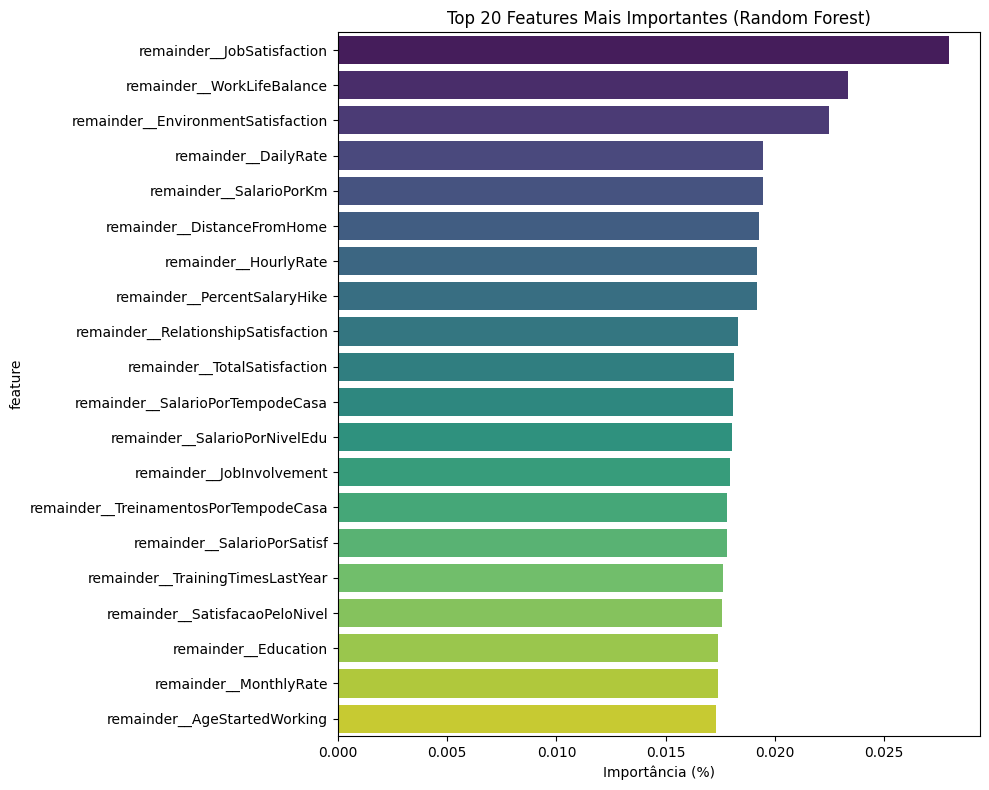

In [52]:
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Top 20 Features Mais Importantes (Random Forest)')
plt.xlabel('Importância (%)')
plt.tight_layout()
plt.show()

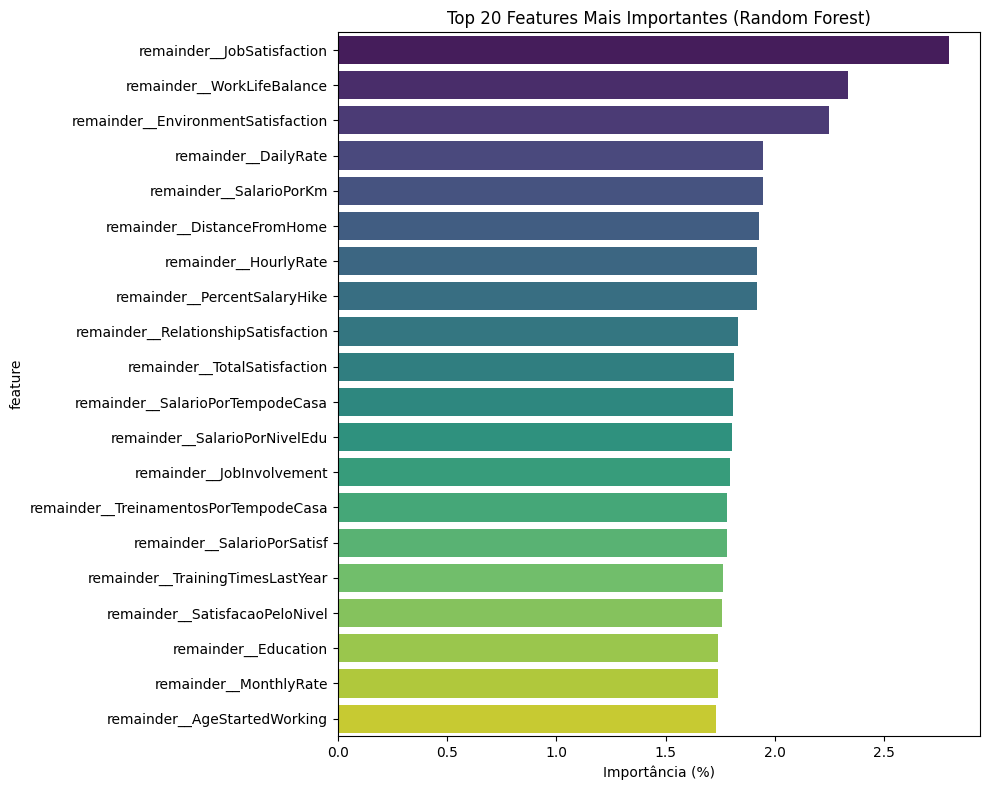

In [73]:
feature_importance['importance_pct'] = feature_importance['importance'] * 100
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance, x='importance_pct', y='feature', palette='viridis')
plt.title('Top 20 Features Mais Importantes (Random Forest)')
plt.xlabel('Importância (%)')
plt.tight_layout()
plt.show()

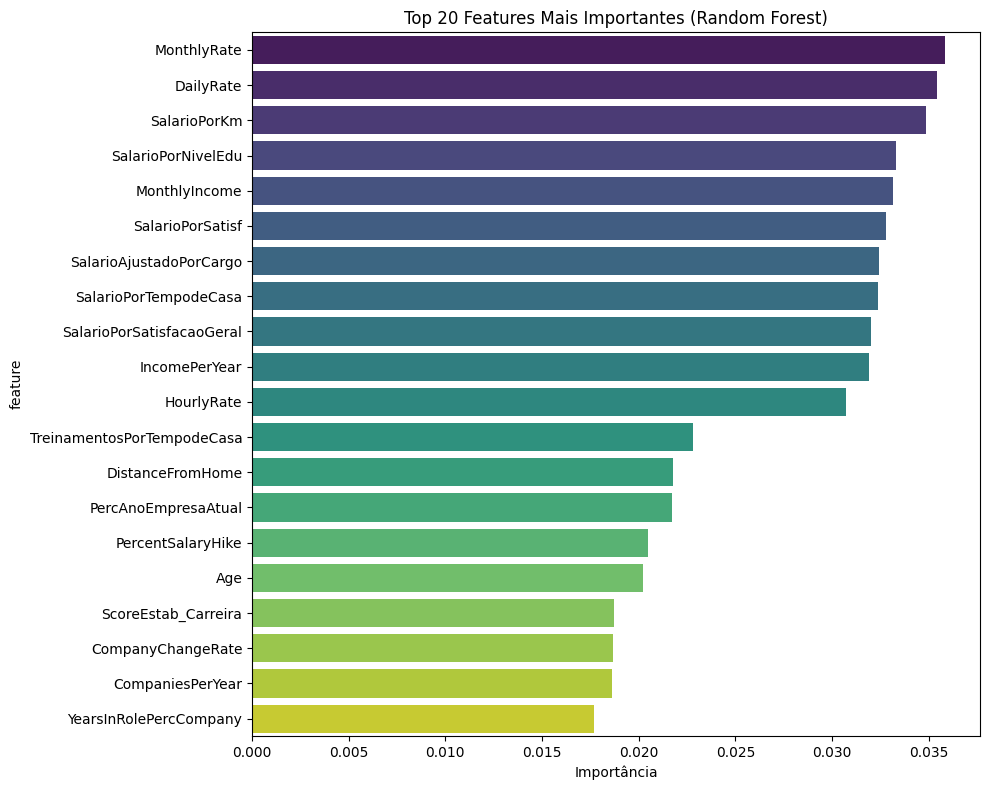

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_quick = RandomForestClassifier(n_estimators=100, random_state=42)
rf_quick.fit(X_train_scaled, y_train)

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_quick.feature_importances_
}).sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Top 20 Features Mais Importantes (Random Forest)')
plt.xlabel('Importância (%)')
plt.tight_layout()
plt.show()

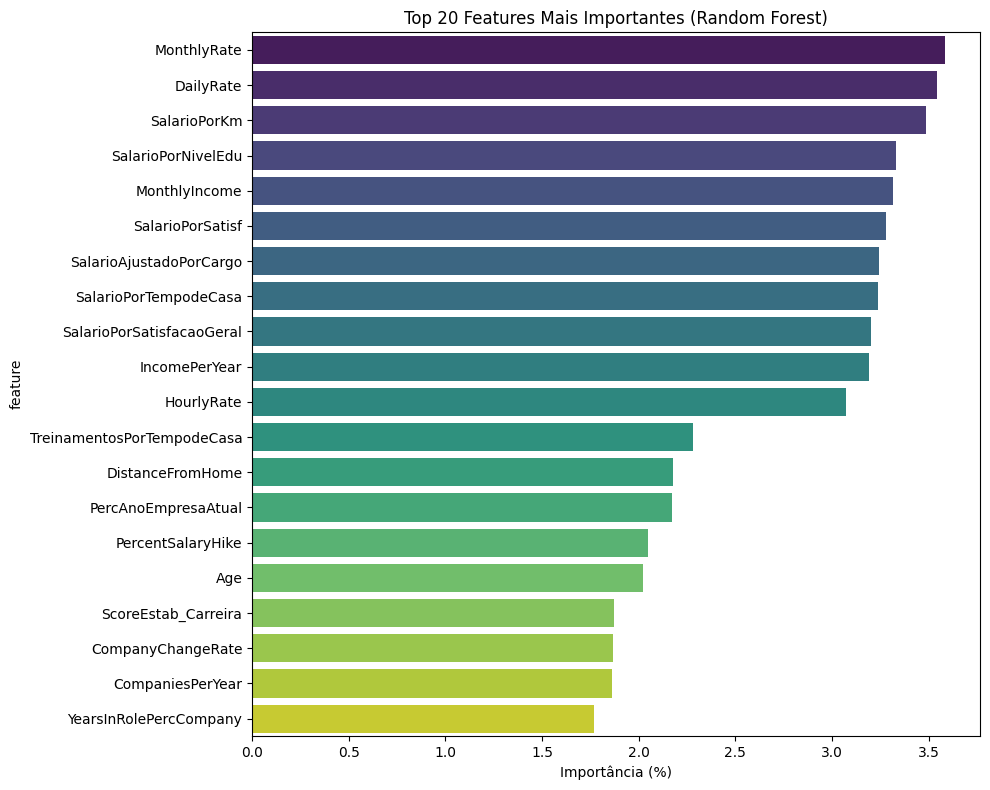

In [36]:
plt.figure(figsize=(10, 8))
feature_importance['importance_pct'] = feature_importance['importance'] * 100
sns.barplot(data=feature_importance, x='importance_pct', y='feature', palette='viridis')
plt.title('Top 20 Features Mais Importantes (Random Forest)')
plt.xlabel('Importância (%)')
plt.tight_layout()
plt.show()

### Permutation importance
    Mede quanto a métrica do modelo cai quando uma feature é embaralhada. pois considera até correlações entre features.

In [74]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf_quick, X_test_normalize, y_test, n_repeats=10, random_state=42)
imp_df = pd.DataFrame({'feature': X_train.columns, 'importance': result.importances_mean}).sort_values('importance', ascending=False)
imp_df

,feature,importance
34,JobSatisfaction,0.000757
30,EnvironmentSatisfaction,0.000238
59,ScoreEstabilidadeFormat,0.000186
61,PercAnoEmpresaAtual,0.000177
44,WorkLifeBalance,0.000098
...,...,...
60,Burnout,-0.000065
26,Age,-0.000072
67,SalarioPorKm,-0.000104
64,TempoCargoAtualPeloNivel,-0.000113


In [75]:
imp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 34 to 24
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature     79 non-null     object 
 1   importance  79 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [76]:
imp_df.sort_values('importance', ascending=False)

,feature,importance
34,JobSatisfaction,0.000757
30,EnvironmentSatisfaction,0.000238
59,ScoreEstabilidadeFormat,0.000186
61,PercAnoEmpresaAtual,0.000177
44,WorkLifeBalance,0.000098
...,...,...
60,Burnout,-0.000065
26,Age,-0.000072
67,SalarioPorKm,-0.000104
64,TempoCargoAtualPeloNivel,-0.000113


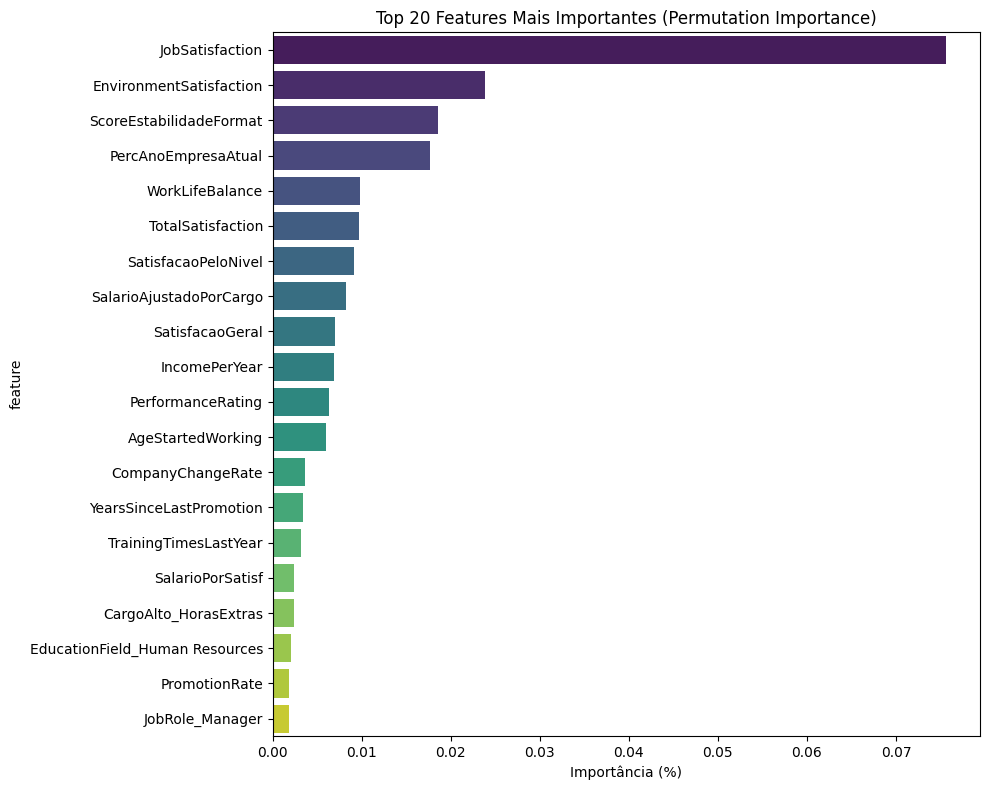

In [77]:
plt.figure(figsize=(10, 8))
imp_df['importance_pct'] = imp_df['importance'] * 100
sns.barplot(data=imp_df.head(20), x='importance_pct', y='feature', palette='viridis')
plt.title('Top 20 Features Mais Importantes (Permutation Importance)')
plt.xlabel('Importância (%)')
plt.tight_layout()
plt.show()

### SHAP

In [78]:
import shap
explainer = shap.Explainer(rf_quick)

In [ ]:
amostra = 1_000
X_sample = X_test_normalize[:amostra]
shap_values = explainer.shap_values(X_sample)

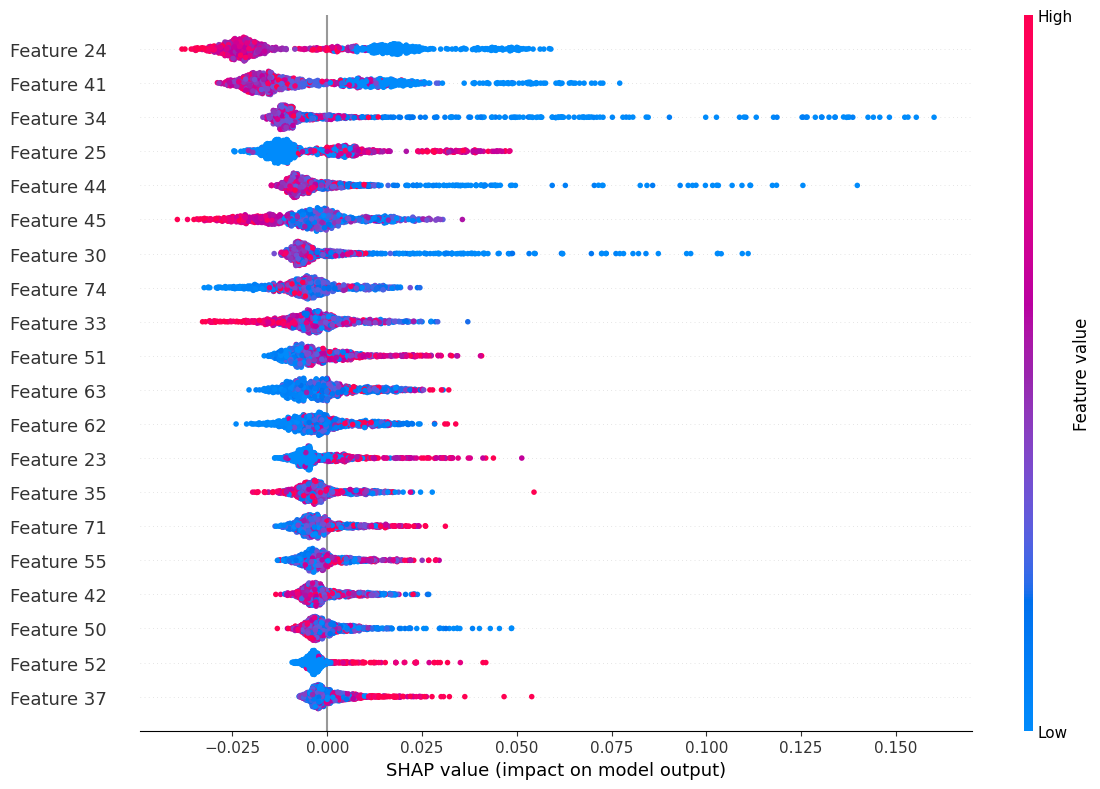

In [84]:
shap_values_class_1 = shap_values[:, :, 1]
shap.summary_plot(shap_values_class_1, X_sample, plot_size=(12, 8))

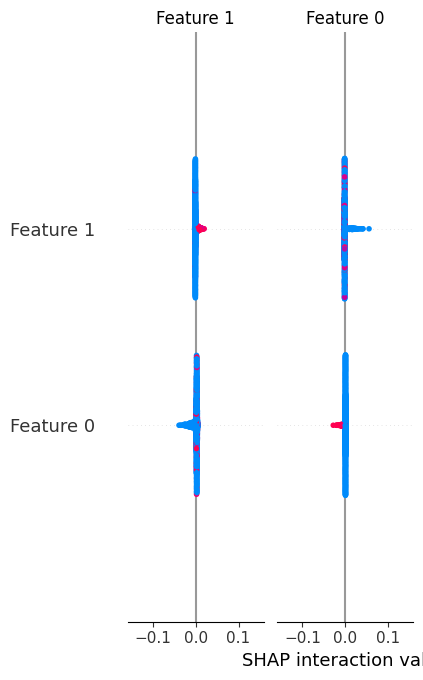

In [82]:
shap.summary_plot(shap_values, X_sample)

## Treinamento dos modelos

### Func avaliacao modelo

* Matriz de Confusão
    * 0 = classe negativa (ficou), 1 = classe positiva (saiu)
    * Linhas = Valor Real, Colunas = Predito
        * [0,0] (Topo esquerdo): Verdadeiros Negativos (acertou quem ficou)
        * [0,1] (Topo direito): Falsos Positivos (errou, previu que saiu mas ficou) 
        * [1,0] (Baixo esquerdo): Falsos Negativos (errou, previu que ficou mas saiu) 
        * [1,1] (Baixo direito): Verdadeiros Positivos (acertou quem saiu)
* Curva ROC e AUC
    * ROC = Receiver Operating Characteristic
        * Eixo X: Falso Positivo (FP rate)
        * Eixo Y: Verdadeiro Positivo (TP rate)

    * AUC: Área sob a curva ROC. Mede a capacidade do modelo distinguir as classes.
        * AUC = 0.5 → Modelo aleatório (sem poder preditivo)
        * AUC = 1.0 → Modelo perfeito
* Curva Precision-Recall
    * Precision (Precisão): Dos que o modelo disse que “saiu”, quantos saíram de verdade?
    * Recall (Sensibilidade): Dos que saíram de verdade, quantos o modelo encontrou?
    * Curva: Mostra o trade-off entre tentar acertar todos (recall alto) e não errar muito (precision alto).

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve,precision_score,recall_score, f1_score

def avaliar_modelo(modelo, X_train, X_test, y_train, y_test, nome='Modelo'):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else modelo.decision_function(X_test)

    print(f"\n{nome}\n", "="*40)
    print(classification_report(y_test, y_pred, digits=3))
    fig, axes = plt.subplots(1, 4, figsize=(20, 6))
    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title(f'Matriz de Confusão - {nome}')
    axes[0].set_xlabel('Predito')
    axes[0].set_ylabel('Real')

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    sns.lineplot(x=fpr, y=tpr, ax=axes[1],  label=f'AUC = {roc_auc:.3f}')
    axes[1].plot([0,1],[0,1],'k--')
    axes[1].set_title(f'Curva ROC - {nome}')
    axes[1].set_xlabel('Falso Positivo')
    axes[1].set_ylabel('Verdadeiro Positivo')
    axes[1].legend()
    
    # Curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    sns.lineplot(x=recall, y=precision, ax=axes[2])
    axes[2].set_title(f'Precision-Recall Curve - {nome}')
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')

    # Precision, Recall e F1-score vs Threshold
    thresholds = np.arange(0.0, 1.01, 0.05)
    precisions, recalls, f1s = [], [], []
    for thresh in thresholds:
        y_pred_th = (y_proba >= thresh).astype(int)
        precisions.append(precision_score(y_test, y_pred_th, zero_division=0))
        recalls.append(recall_score(y_test, y_pred_th, zero_division=0))
        f1s.append(f1_score(y_test, y_pred_th, zero_division=0))

    axes[3].plot(thresholds, precisions, label='Precision')
    axes[3].plot(thresholds, recalls, label='Recall')
    axes[3].plot(thresholds, f1s, label='F1-score')
    axes[3].set_xlabel('Threshold')
    axes[3].set_ylabel('Score')
    axes[3].set_title(f'Prec/Recall/F1 vs Threshold')
    axes[3].legend()
    axes[3].grid()

    plt.tight_layout()
    plt.show()

### xgboost

In [94]:
from collections import Counter

# Para classes 0 e 1 (ajuste se seu problema for diferente)
counter = Counter(y_train)
n_0 = counter[0]  # Ex: ficou
n_1 = counter[1]  # Ex: saiu

scale_pos_weight = n_0 / n_1
scale_pos_weight

4.59155116618789

In [95]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,scale_pos_weight=scale_pos_weight)


XGBoost
              precision    recall  f1-score   support

         0.0      0.886     0.598     0.714    164232
         1.0      0.260     0.647     0.371     35768

    accuracy                          0.607    200000
   macro avg      0.573     0.623     0.543    200000
weighted avg      0.774     0.607     0.653    200000



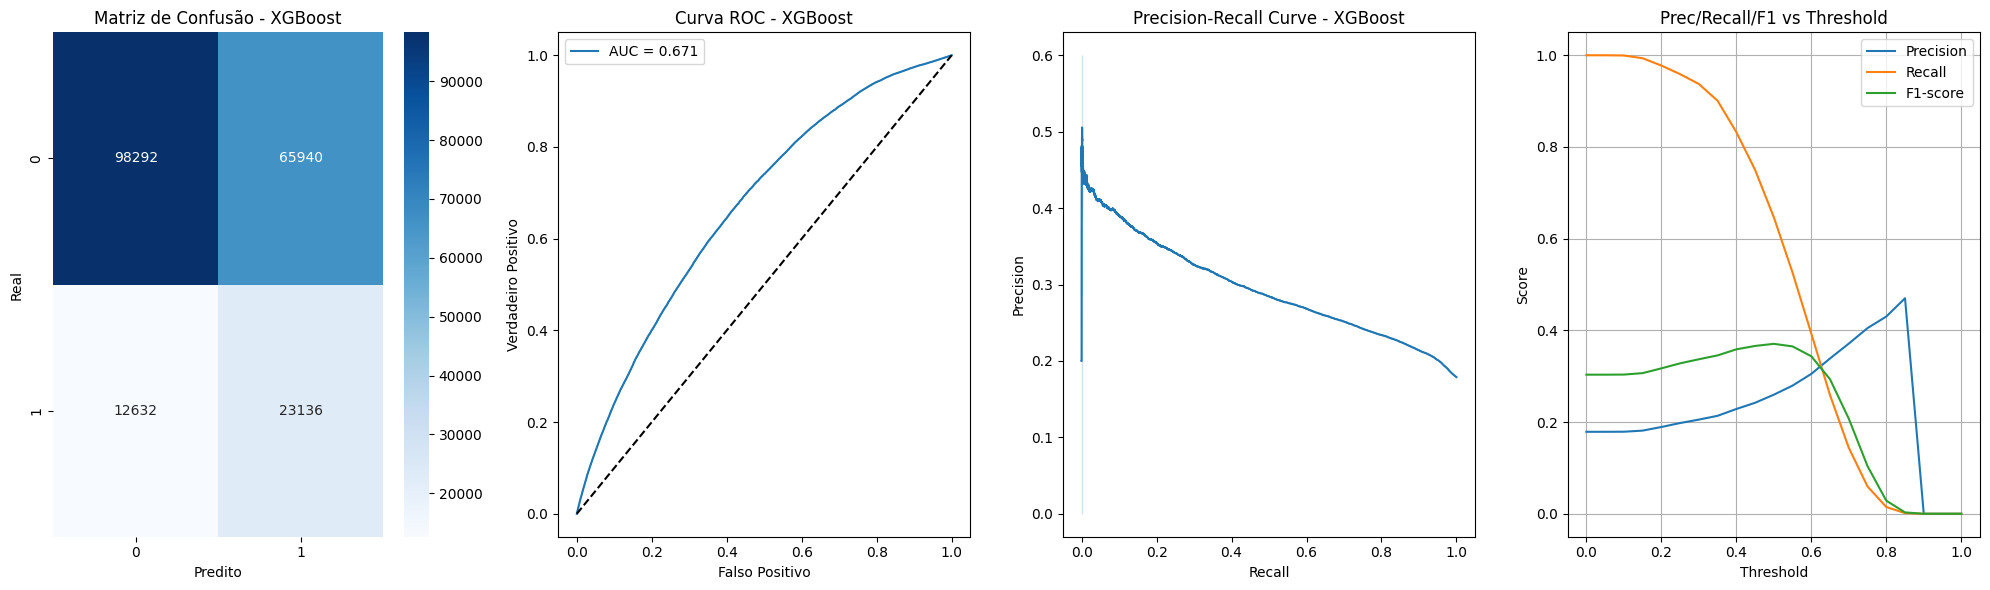

In [98]:
avaliar_modelo(xgb_model, X_train_scaled, X_test_scaled, y_train_over, y_test, nome='XGBoost')

#### Hiperparamtros

##### GridSearchCV
    Testa todas as combinações de parâmetros que você definir.

In [110]:
from sklearn.model_selection import GridSearchCV
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}

grid_xgb = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        param_grid_xgb, cv=3, scoring='f1', n_jobs=-1)
grid_xgb.fit(X_train_scaled, y_train)
print("GridSearchCV XGB:", grid_xgb.best_params_)

/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:47:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:47:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:47:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: User

GridSearchCV XGB: {'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}



XGBoost (Grid)
              precision    recall  f1-score   support

           0      0.826     0.972     0.893    164232
           1      0.317     0.059     0.100     35768

    accuracy                          0.809    200000
   macro avg      0.572     0.516     0.497    200000
weighted avg      0.735     0.809     0.751    200000



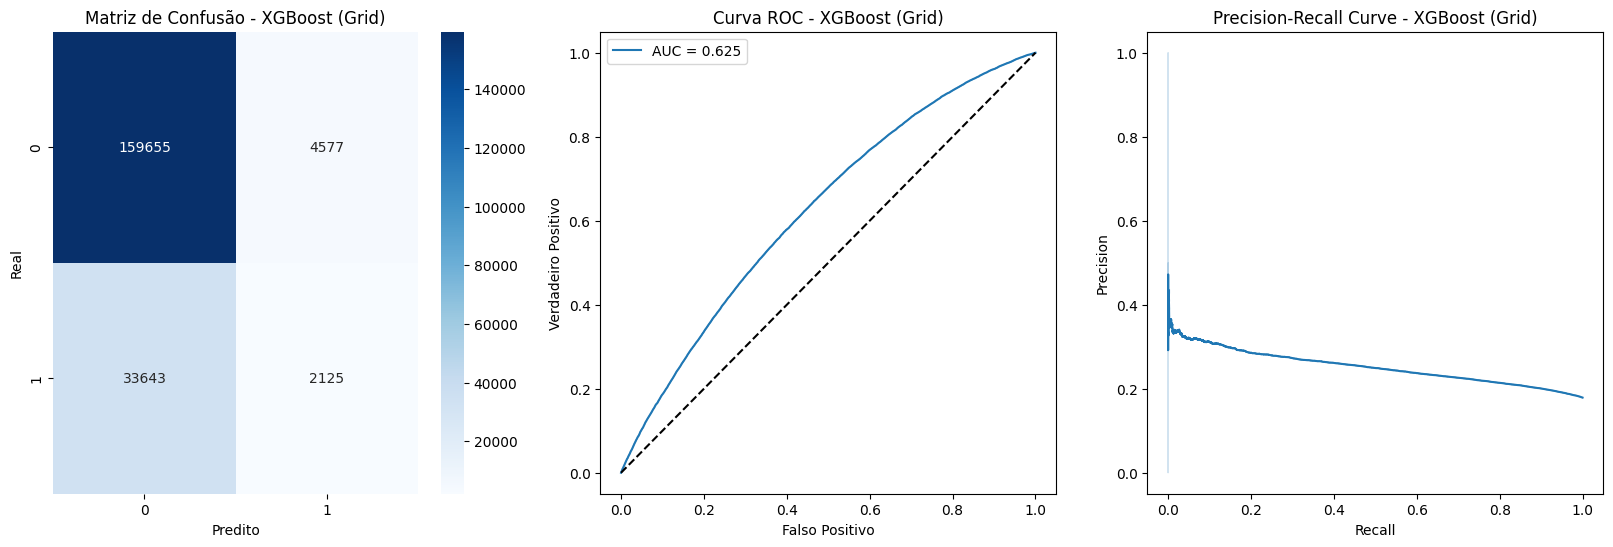

In [111]:
avaliar_modelo(grid_xgb.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test, nome='XGBoost (Grid)')

##### RandomizedSearchCV
    Testa combinações aleatórias dos parâmetros (mais rápido quando tem muitas opções).

In [106]:
from sklearn.model_selection import  RandomizedSearchCV

param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}
rnd_xgb = RandomizedSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                             param_distributions=param_dist_xgb, n_iter=10, cv=3, scoring='f1', n_jobs=-1)
rnd_xgb.fit(X_train_scaled, y_train)
print("RandomizedSearchCV XGB:", rnd_xgb.best_params_)

/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:33:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:33:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:33:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: User

RandomizedSearchCV XGB: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.3}



XGBoost (Random)
              precision    recall  f1-score   support

           0      0.826     0.972     0.893    164232
           1      0.317     0.059     0.100     35768

    accuracy                          0.809    200000
   macro avg      0.572     0.516     0.497    200000
weighted avg      0.735     0.809     0.751    200000



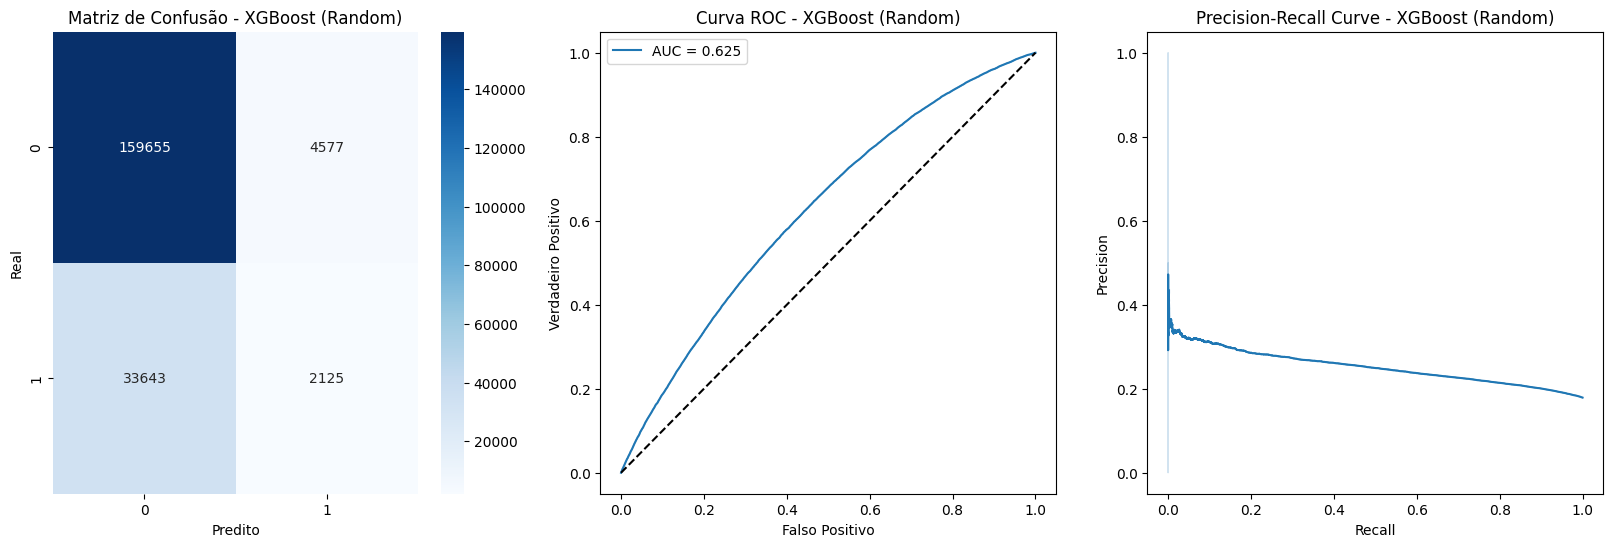

In [107]:
avaliar_modelo(rnd_xgb.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test, nome='XGBoost (Random)')

##### Otimização bayesiana
    A otimização bayesiana é uma técnica baseada no teorema de Bayes, que descreve a probabilidade de ocorrência de um evento relacionado ao conhecimento atual

In [108]:
from skopt import BayesSearchCV

search_spaces_xgb = {
    'n_estimators': (100, 300),
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'subsample': (0.8, 1.0)
}
opt_xgb = BayesSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    search_spaces=search_spaces_xgb,
    n_iter=20,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    random_state=42
)
opt_xgb.fit(X_train_scaled, y_train)
print("BayesSearchCV XGB:", opt_xgb.best_params_)

/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:38:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:38:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:38:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: User

BayesSearchCV XGB: OrderedDict({'learning_rate': 0.29999999999999993, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.8})



XGBoost (Bayes)
              precision    recall  f1-score   support

           0      0.827     0.967     0.891    164232
           1      0.314     0.070     0.115     35768

    accuracy                          0.806    200000
   macro avg      0.571     0.518     0.503    200000
weighted avg      0.735     0.806     0.752    200000



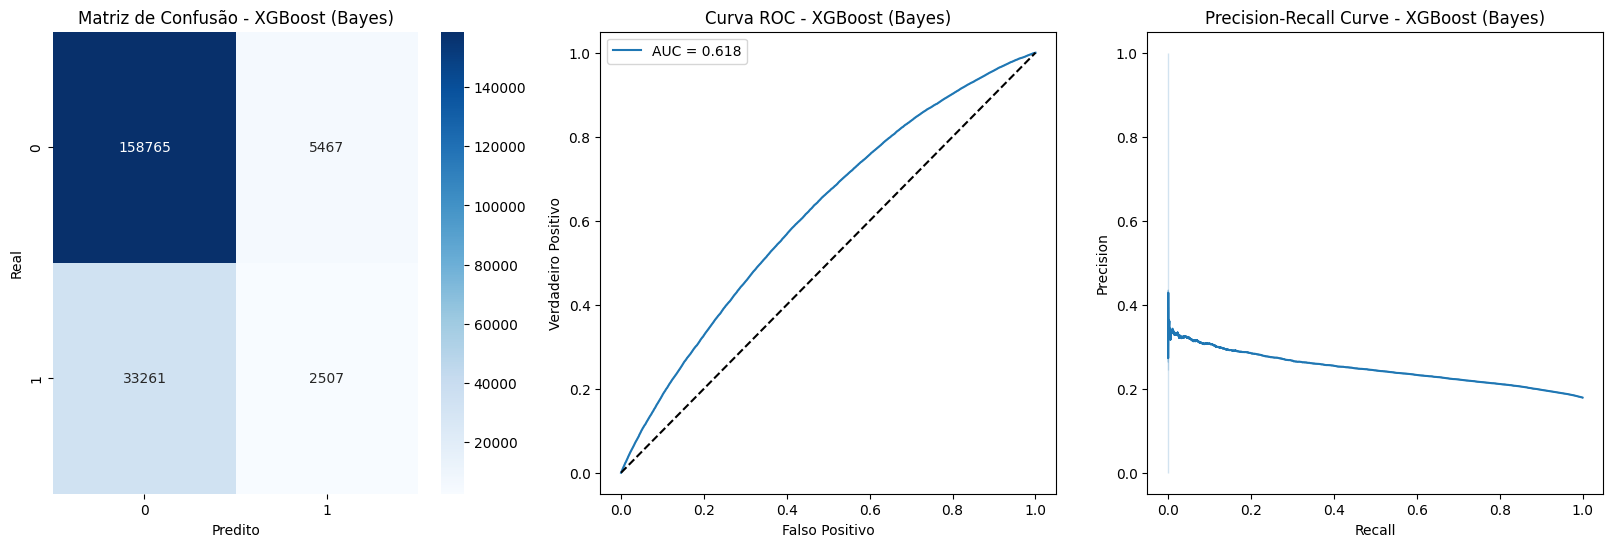

In [109]:
avaliar_modelo(opt_xgb.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test, nome='XGBoost (Bayes)')

##### Optuna
    é um dos frameworks mais modernos para hyperparameter tuning, super flexível e fácil de usar.
    Ele funciona diferente: você define uma função de objetivo, e o Optuna faz os testes.

In [112]:
import optuna
from sklearn.model_selection import cross_val_score

def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'random_state': 42
    }
    model = xgb.XGBClassifier(**params)
    score = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='f1').mean()
    return score

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=20)
print("Optuna XGB:", study_xgb.best_params)
best_xgb_optuna = xgb.XGBClassifier(**study_xgb.best_params)
best_xgb_optuna.fit(X_train_scaled, y_train)

[I 2025-07-14 18:53:59,839] A new study created in memory with name: no-name-947b19ba-ac4f-4874-93eb-9e01759fc744
[I 2025-07-14 18:54:05,132] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 109, 'max_depth': 6, 'learning_rate': 0.012458420173819328, 'subsample': 0.9228027711542435}. Best is trial 0 with value: 0.0.
[I 2025-07-14 18:54:13,379] Trial 1 finished with value: 0.0064430465065752965 and parameters: {'n_estimators': 219, 'max_depth': 5, 'learning_rate': 0.03211719899751568, 'subsample': 0.8941008094164923}. Best is trial 1 with value: 0.0064430465065752965.
[I 2025-07-14 18:54:21,666] Trial 2 finished with value: 0.010612444331361026 and parameters: {'n_estimators': 181, 'max_depth': 7, 'learning_rate': 0.05965561933150003, 'subsample': 0.9699827651400112}. Best is trial 2 with value: 0.010612444331361026.
[I 2025-07-14 18:54:28,447] Trial 3 finished with value: 0.004272974723413015 and parameters: {'n_estimators': 216, 'max_depth': 4, 'learning_rate': 0.0245

Optuna XGB: {'n_estimators': 168, 'max_depth': 10, 'learning_rate': 0.28536986108817386, 'subsample': 0.8033606543862889}


FileNotFoundError: [Errno 2] No such file or directory: '/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/utils/_repr_html/estimator.js'

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/utils/_repr_html/estimator.js'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.28536986108817386, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=168, n_jobs=None,
              num_parallel_tree=None, ...)


XGBoost (Optuna)
              precision    recall  f1-score   support

           0      0.826     0.977     0.895    164232
           1      0.331     0.052     0.090     35768

    accuracy                          0.812    200000
   macro avg      0.578     0.515     0.492    200000
weighted avg      0.737     0.812     0.751    200000



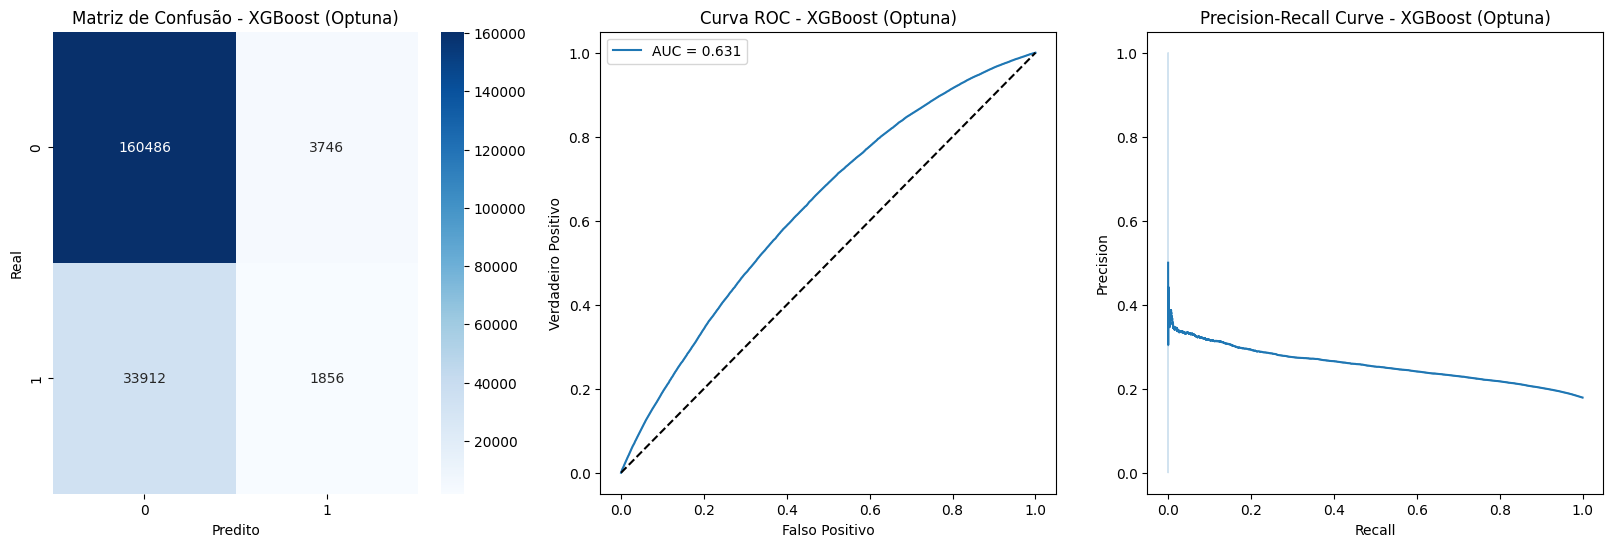

In [113]:
avaliar_modelo(best_xgb_optuna, X_train_scaled, X_test_scaled, y_train, y_test, nome='XGBoost (Optuna)')

### random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


Random Forest
              precision    recall  f1-score   support

           0      0.821     0.999     0.902    164232
           1      0.405     0.003     0.007     35768

    accuracy                          0.821    200000
   macro avg      0.613     0.501     0.454    200000
weighted avg      0.747     0.821     0.742    200000



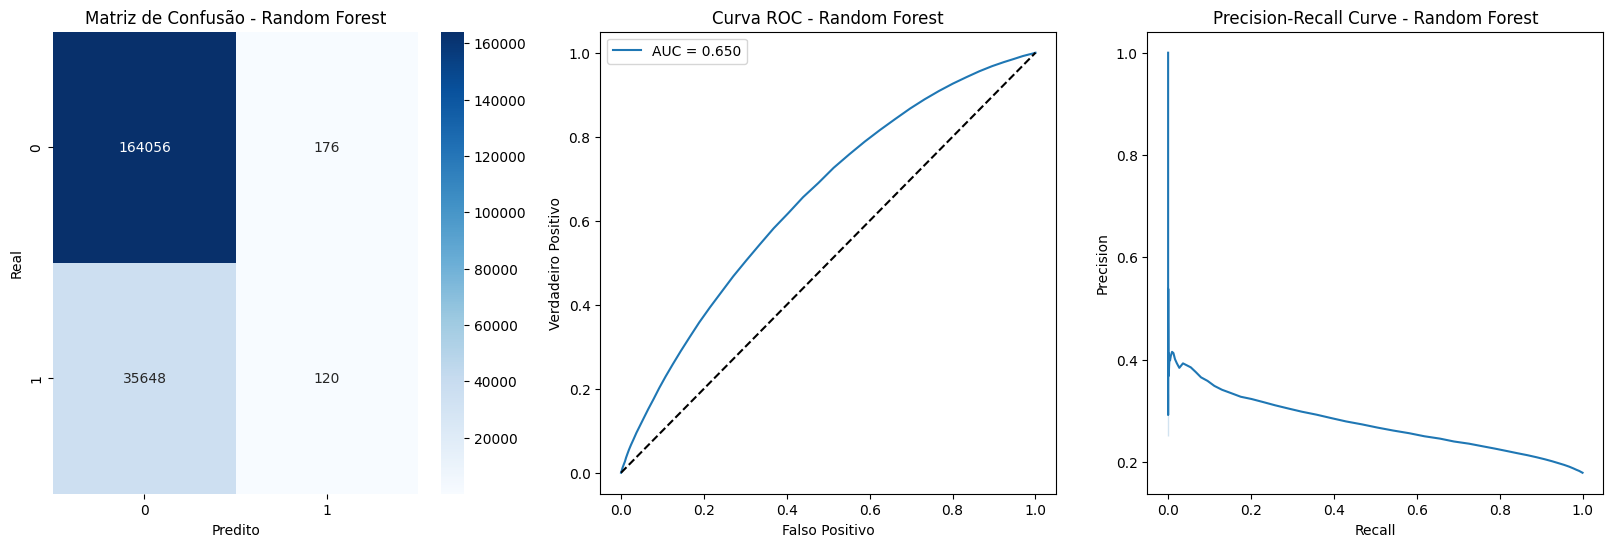

In [94]:
avaliar_modelo(rf_model, X_train_scaled, X_test_scaled, y_train, y_test, nome='Random Forest')

#### Hiperparamtros

##### GridSearchCV
    Testa todas as combinações de parâmetros que você definir.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', n_jobs=-1)
grid.fit(X_train_scaled, y_train)
print("Melhores parâmetros:", grid.best_params_)
best_rf = grid.best_estimator_


Random Forest (GridSearchCV)
              precision    recall  f1-score   support

           0      0.821     1.000     0.902    164232
           1      0.420     0.002     0.003     35768

    accuracy                          0.821    200000
   macro avg      0.621     0.501     0.452    200000
weighted avg      0.750     0.821     0.741    200000



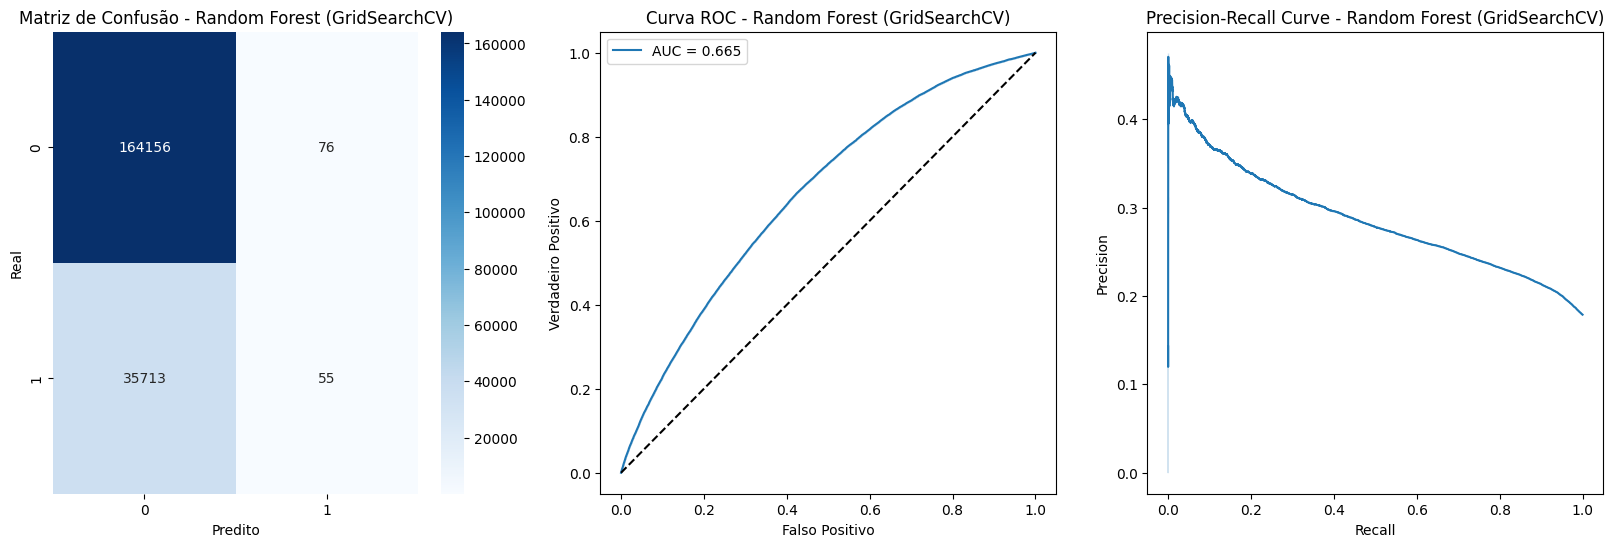

In [98]:
avaliar_modelo(best_rf, X_train_scaled, X_test_scaled, y_train, y_test, nome='Random Forest (GridSearchCV)')

##### RandomizedSearchCV
    Testa combinações aleatórias dos parâmetros (mais rápido quando tem muitas opções).

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'max_depth': [3, 5, 7, None],
    'n_estimators': [50, 100, 200, 300],
    'min_samples_split': [2, 5, 10]
}
rnd = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42)
rnd.fit(X_train_scaled, y_train)
print("Melhores parâmetros:", rnd.best_params_)
best_rf_rnd = rnd.best_estimator_


Random Forest (RandomizedSearchCV)
              precision    recall  f1-score   support

           0      0.822     0.997     0.901    164232
           1      0.410     0.009     0.017     35768

    accuracy                          0.820    200000
   macro avg      0.616     0.503     0.459    200000
weighted avg      0.748     0.820     0.743    200000



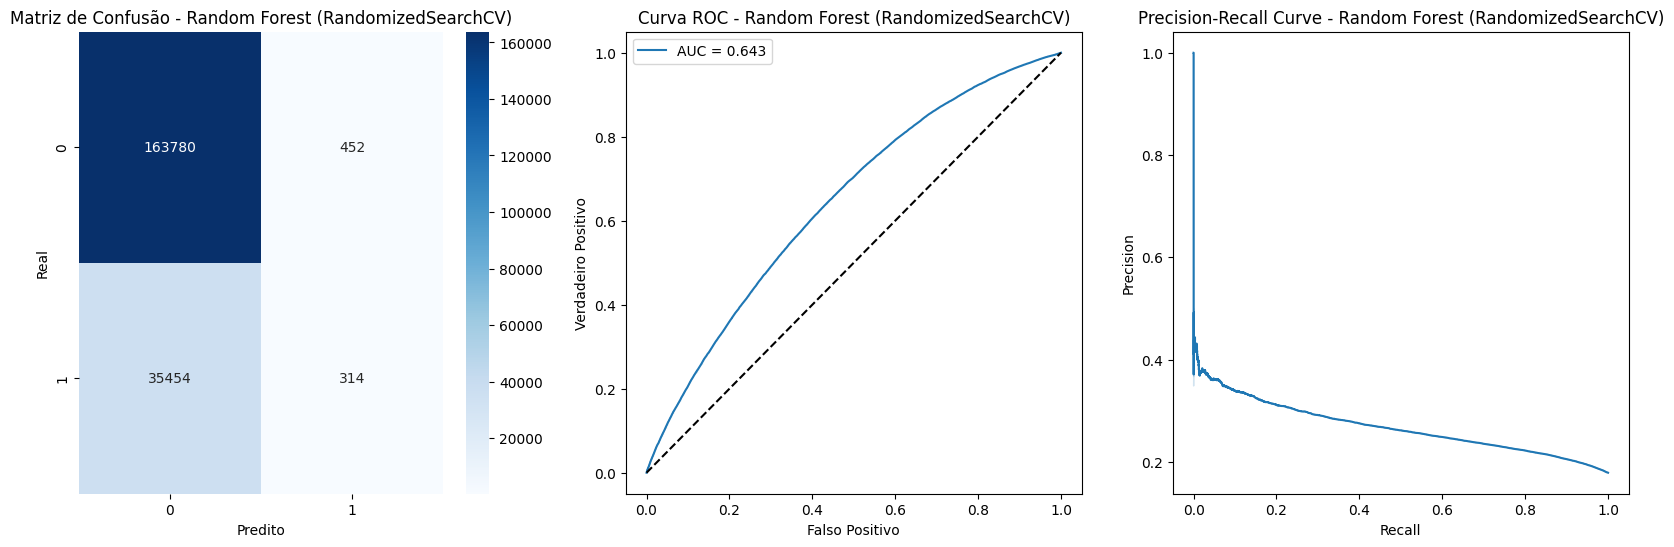

In [95]:
avaliar_modelo(best_rf_rnd, X_train_scaled, X_test_scaled, y_train, y_test, nome='Random Forest (RandomizedSearchCV)')

##### Otimização bayesiana
    A otimização bayesiana é uma técnica baseada no teorema de Bayes, que descreve a probabilidade de ocorrência de um evento relacionado ao conhecimento atual

In [ ]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier

search_spaces = {
    'max_depth': (3, 30),  # valores inteiros entre 3 e 30
    'n_estimators': (50, 500),
    'min_samples_split': (2, 20)
}

opt = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    search_spaces=search_spaces,
    n_iter=20,  # número de avaliações de combinações
    scoring='f1',
    cv=3,
    n_jobs=-1,
    random_state=42
)

opt.fit(X_train_scaled, y_train)
print("Melhores parâmetros (Bayesian):", opt.best_params_)
best_rf_bayes = opt.best_estimator_



Random Forest (BayesSearchCV)
              precision    recall  f1-score   support

           0      0.822     0.997     0.901    164232
           1      0.397     0.009     0.017     35768

    accuracy                          0.820    200000
   macro avg      0.609     0.503     0.459    200000
weighted avg      0.746     0.820     0.743    200000



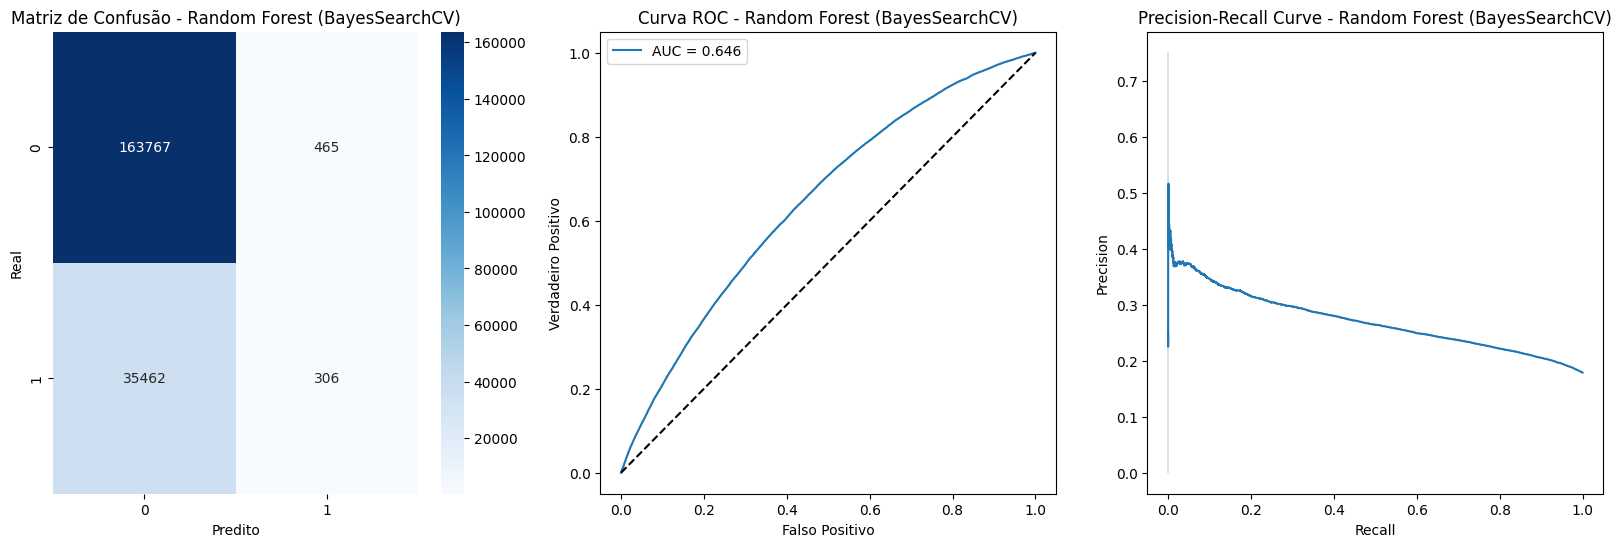

In [96]:
avaliar_modelo(best_rf_bayes, X_train_scaled, X_test_scaled, y_train, y_test, nome='Random Forest (BayesSearchCV)')

##### Optuna
    é um dos frameworks mais modernos para hyperparameter tuning, super flexível e fácil de usar.
    Ele funciona diferente: você define uma função de objetivo, e o Optuna faz os testes.

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 3, 30)
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    
    clf = RandomForestClassifier(
        max_depth=max_depth,
        n_estimators=n_estimators,
        min_samples_split=min_samples_split,
        random_state=42,
        n_jobs=-1
    )
    score = cross_val_score(clf, X_train_scaled, y_train, cv=3, scoring='f1').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  # aumenta n_trials para tunagem mais longa

print("Melhores parâmetros (Optuna):", study.best_params)
best_rf_optuna = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)
best_rf_optuna.fit(X_train_scaled, y_train)


Melhores parâmetros (Optuna): {'max_depth': 30, 'n_estimators': 266, 'min_samples_split': 5}



Random Forest (Optuna)
              precision    recall  f1-score   support

           0      0.821     1.000     0.902    164232
           1      0.429     0.001     0.002     35768

    accuracy                          0.821    200000
   macro avg      0.625     0.500     0.452    200000
weighted avg      0.751     0.821     0.741    200000



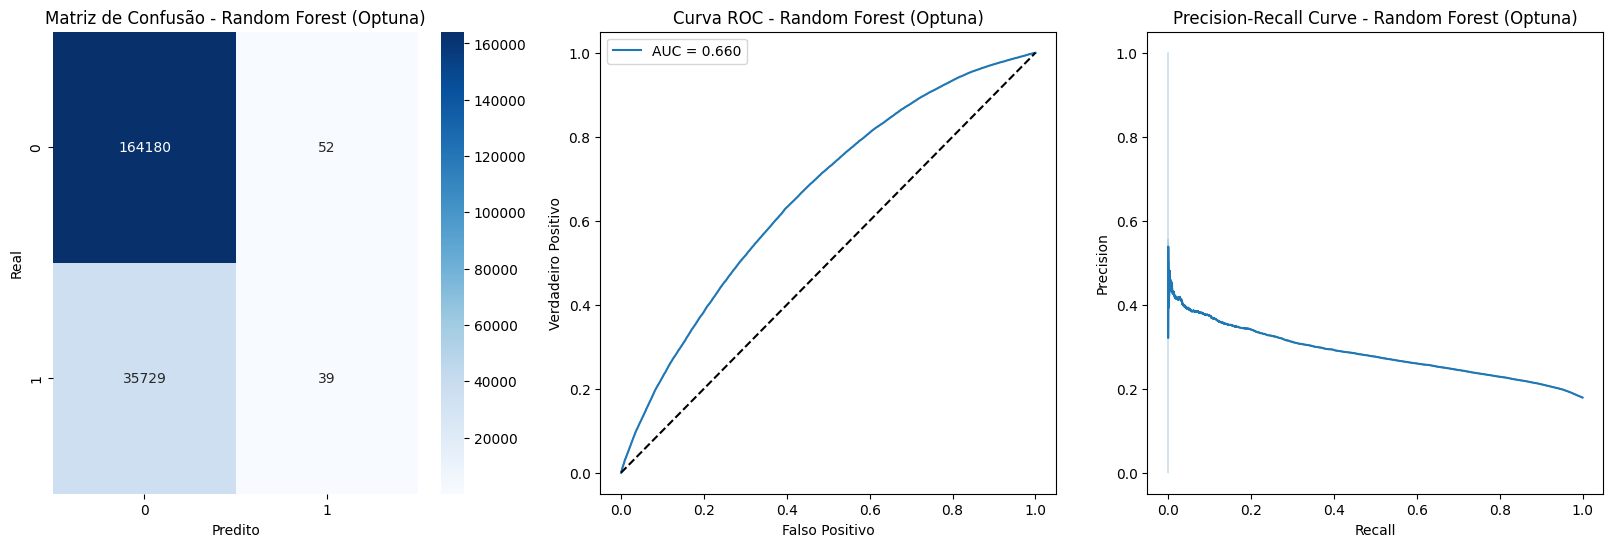

In [97]:
avaliar_modelo(best_rf_optuna, X_train_scaled, X_test_scaled, y_train, y_test, nome='Random Forest (Optuna)')

##### Hyperopt

### ligthgbm

In [67]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=42)
avaliar_modelo(lgb_model, X_train_scaled, X_test_scaled, y_train, y_test, nome='LightGBM')


OSError: dlopen(/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/lightgbm/lib/lib_lightgbm.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib
  Referenced from: <D44045CD-B874-3A27-9A61-F131D99AACE4> /Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/lightgbm/lib/lib_lightgbm.dylib
  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/local/lib/libomp/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/local/lib/libomp/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/local/lib/libomp/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/local/lib/libomp/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file)

### Logistic Regression
    

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000, random_state=42)



Logistic Regression
              precision    recall  f1-score   support

           0      0.822     0.999     0.902    164232
           1      0.524     0.004     0.007     35768

    accuracy                          0.821    200000
   macro avg      0.673     0.501     0.455    200000
weighted avg      0.768     0.821     0.742    200000



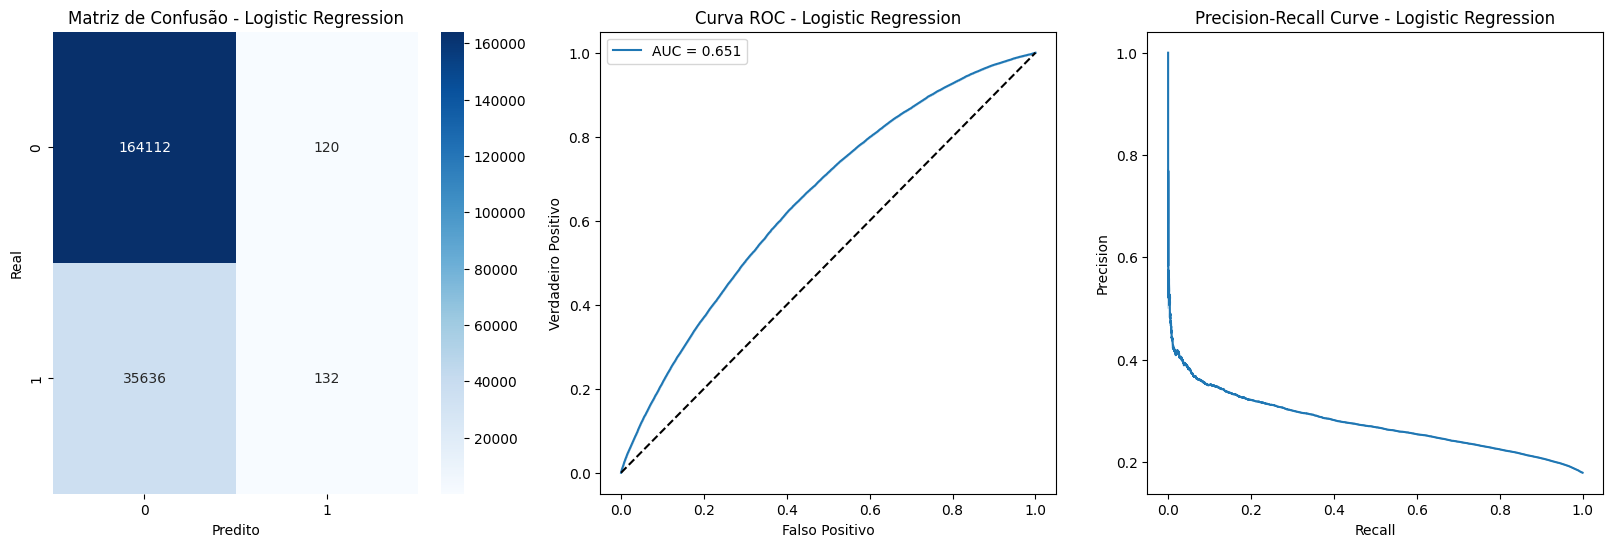

In [105]:
avaliar_modelo(lr_model, X_train_scaled, X_test_scaled, y_train, y_test, nome='Logistic Regression')

#### Hiperparamtros

##### GridSearchCV
    Testa todas as combinações de parâmetros que você definir.

In [117]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'], # use 'l1' se solver='liblinear'
    'solver': ['lbfgs']
}
# Grid
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=3, scoring='f1', n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train)
print("GridSearchCV LR:", grid_lr.best_params_)


/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/base.py:380: Inconsi

GridSearchCV LR: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}



Logistic Regression (Grid)
              precision    recall  f1-score   support

           0      0.822     0.999     0.902    164232
           1      0.524     0.004     0.007     35768

    accuracy                          0.821    200000
   macro avg      0.673     0.501     0.455    200000
weighted avg      0.768     0.821     0.742    200000



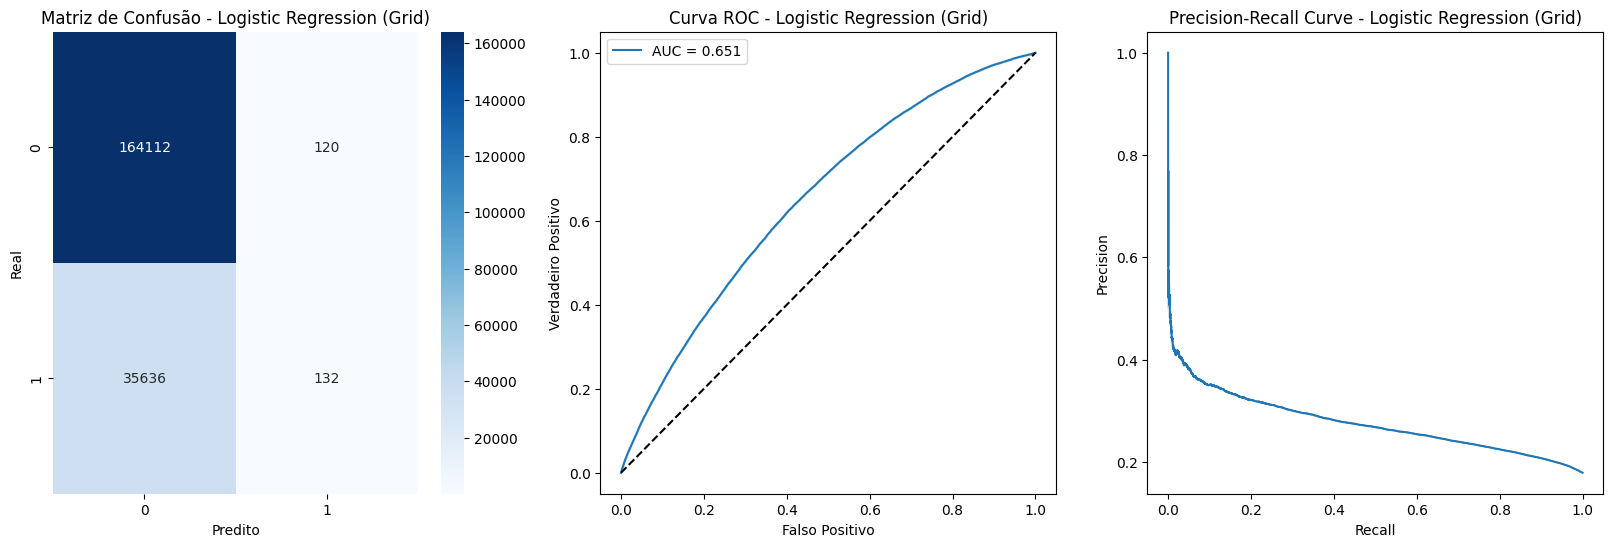

In [118]:
avaliar_modelo(grid_lr.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test, nome='Logistic Regression (Grid)')

##### RandomizedSearchCV
    Testa combinações aleatórias dos parâmetros (mais rápido quando tem muitas opções).

In [114]:

param_randomized_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'], # use 'l1' se solver='liblinear'
    'solver': ['lbfgs']
}
random_lr = RandomizedSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_randomized_lr, cv=3, scoring='f1', n_jobs=-1)
random_lr.fit(X_train_scaled, y_train)
print("RandomizedSearchCV LR:", random_lr.best_params_)

/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/base.py:380: Inconsi

RandomizedSearchCV LR: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1}



Logistic Regression (Randomized)
              precision    recall  f1-score   support

           0      0.822     0.999     0.902    164232
           1      0.524     0.004     0.007     35768

    accuracy                          0.821    200000
   macro avg      0.673     0.501     0.455    200000
weighted avg      0.768     0.821     0.742    200000



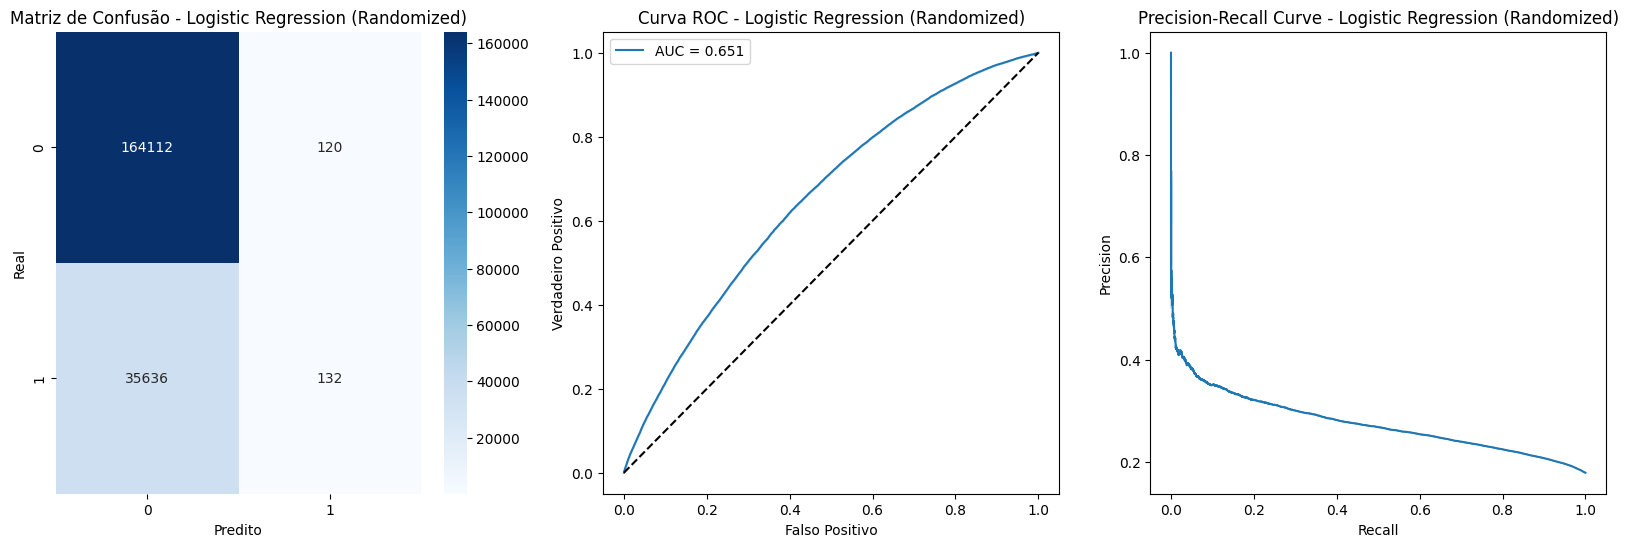

In [115]:
avaliar_modelo(random_lr.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test, nome='Logistic Regression (Randomized)')

##### Otimização bayesiana
    A otimização bayesiana é uma técnica baseada no teorema de Bayes, que descreve a probabilidade de ocorrência de um evento relacionado ao conhecimento atual

In [ ]:
from skopt import BayesSearchCV
from sklearn.linear_model import LogisticRegression

search_spaces_lr = {
    'C': (0.001, 10.0, 'log-uniform'),
    'solver': ['lbfgs', 'liblinear'],
}
bayes_lr = BayesSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    search_spaces=search_spaces_lr,
    n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42
)
bayes_lr.fit(X_train_scaled, y_train)
print("BayesSearchCV LR:", bayes_lr.best_params_)

/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/base.py:380: Inconsi

In [ ]:
avaliar_modelo(bayes_lr.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test, nome='Logistic Regression (Bayes)')

##### Optuna
    é um dos frameworks mais modernos para hyperparameter tuning, super flexível e fácil de usar.
    Ele funciona diferente: você define uma função de objetivo, e o Optuna faz os testes.

In [ ]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def objective_lr(trial):
    C = trial.suggest_loguniform('C', 0.001, 10.0)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear'])
    model = LogisticRegression(C=C, solver=solver, max_iter=1000, random_state=42)
    score = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='f1').mean()
    return score

study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=10)
print("Optuna LR:", study_lr.best_params)
best_lr_optuna = LogisticRegression(**study_lr.best_params, max_iter=1000, random_state=42)
best_lr_optuna.fit(X_train_scaled, y_train)


In [ ]:
avaliar_modelo(best_lr_optuna, X_train_scaled, X_test_scaled, y_train, y_test, nome='Logistic Regression (Optuna)')

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)


Decision Tree
              precision    recall  f1-score   support

           0      0.831     0.809     0.820    164232
           1      0.219     0.245     0.231     35768

    accuracy                          0.708    200000
   macro avg      0.525     0.527     0.526    200000
weighted avg      0.722     0.708     0.715    200000



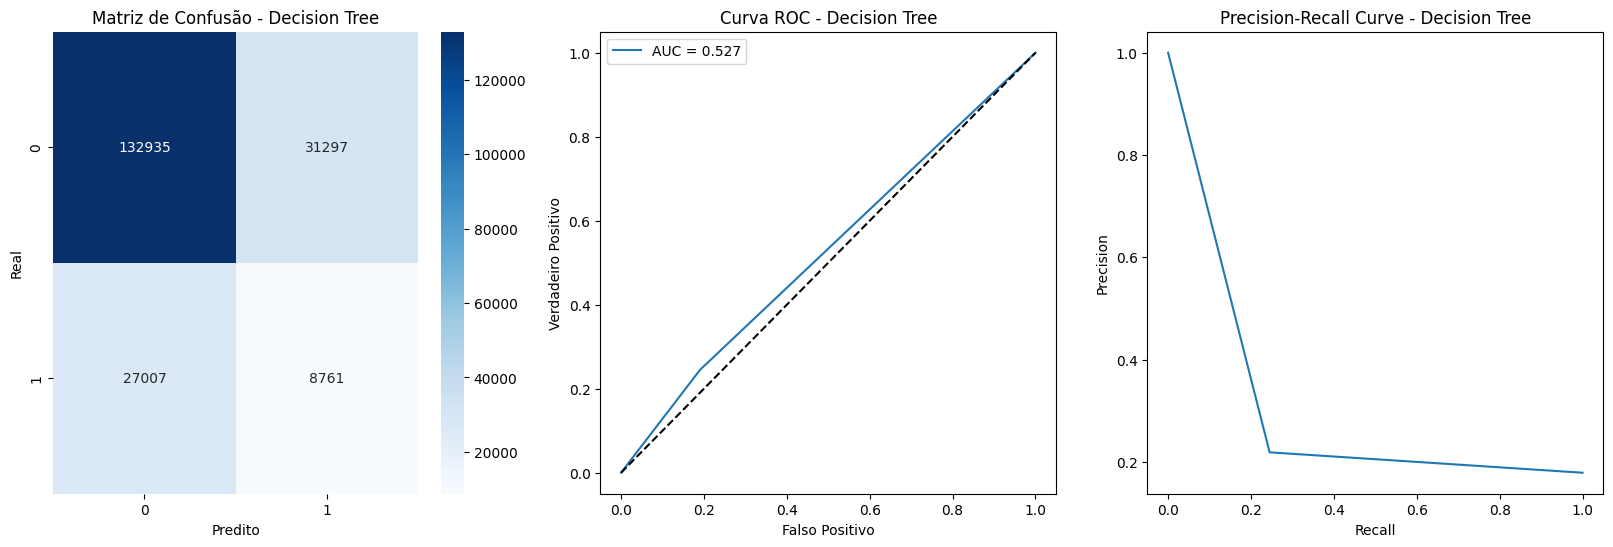

In [104]:
avaliar_modelo(dt_model, X_train_scaled, X_test_scaled, y_train, y_test, nome='Decision Tree')

#### Hiperparamtros

##### GridSearchCV
    Testa todas as combinações de parâmetros que você definir.

In [119]:
param_grid_dt = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=3, scoring='f1', n_jobs=-1)
grid_dt.fit(X_train_scaled, y_train)
print("GridSearchCV DT:", grid_dt.best_params_)

/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/base.py:380:

GridSearchCV DT: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}



Decision Tree (Grid)
              precision    recall  f1-score   support

           0      0.827     0.945     0.882    164232
           1      0.271     0.094     0.139     35768

    accuracy                          0.793    200000
   macro avg      0.549     0.519     0.511    200000
weighted avg      0.728     0.793     0.749    200000



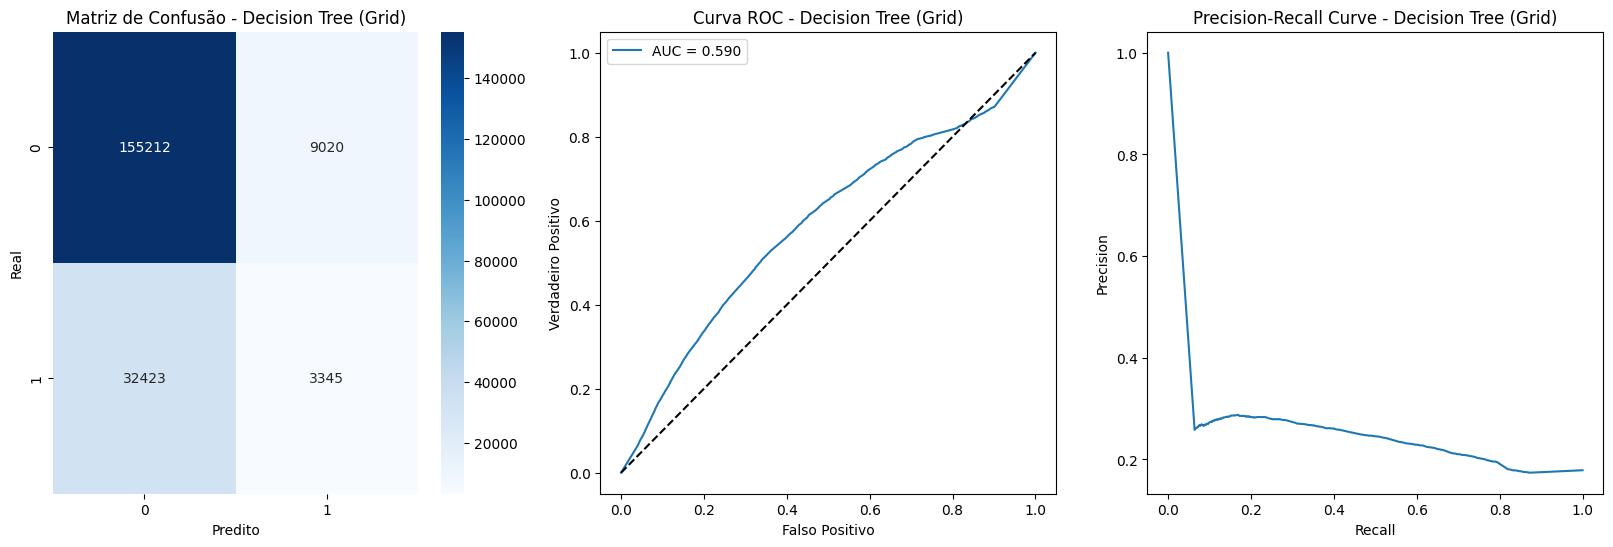

In [120]:
avaliar_modelo(grid_dt.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test, nome='Decision Tree (Grid)')

##### RandomizedSearchCV
    Testa combinações aleatórias dos parâmetros (mais rápido quando tem muitas opções).

In [ ]:
param_dist_dt = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rnd_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_dist_dt, cv=3, scoring='f1', n_jobs=-1)
rnd_dt.fit(X_train_scaled, y_train)
print("RandomizedSearchCV DT:", rnd_dt.best_params_)

/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/base.py:380:

RandomizedSearchCV DT: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}



Decision Tree (Randomized)
              precision    recall  f1-score   support

           0      0.827     0.948     0.883    164232
           1      0.272     0.090     0.135     35768

    accuracy                          0.794    200000
   macro avg      0.549     0.519     0.509    200000
weighted avg      0.728     0.794     0.749    200000



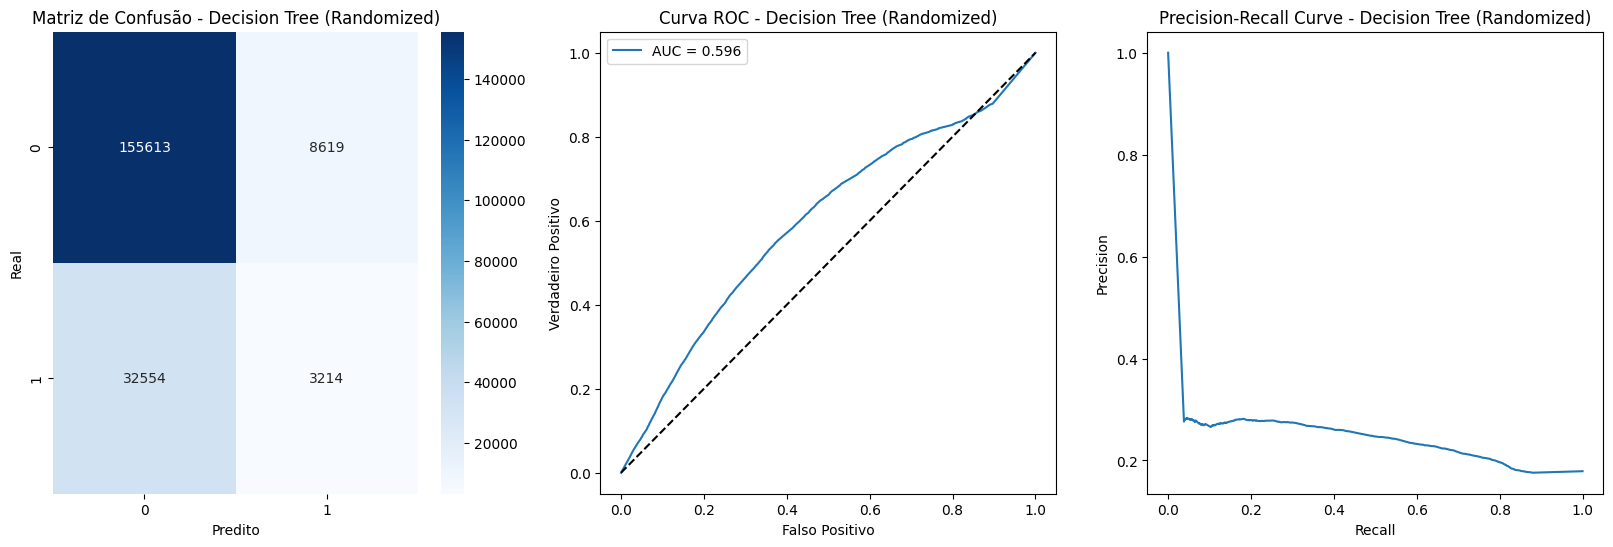

In [122]:
avaliar_modelo(rnd_dt.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test, nome='Decision Tree (Randomized)')

##### Otimização bayesiana
    A otimização bayesiana é uma técnica baseada no teorema de Bayes, que descreve a probabilidade de ocorrência de um evento relacionado ao conhecimento atual

In [123]:
from skopt import BayesSearchCV

search_spaces_dt = {
    'max_depth': (3, 20),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}
bayes_dt = BayesSearchCV(
    DecisionTreeClassifier(random_state=42),
    search_spaces=search_spaces_dt,
    n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42
)
bayes_dt.fit(X_train_scaled, y_train)
print("BayesSearchCV DT:", bayes_dt.best_params_)

/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/base.py:380:

BayesSearchCV DT: OrderedDict({'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 9})



Decision Tree (Bayes)
              precision    recall  f1-score   support

           0      0.826     0.952     0.885    164232
           1      0.272     0.082     0.126     35768

    accuracy                          0.797    200000
   macro avg      0.549     0.517     0.505    200000
weighted avg      0.727     0.797     0.749    200000



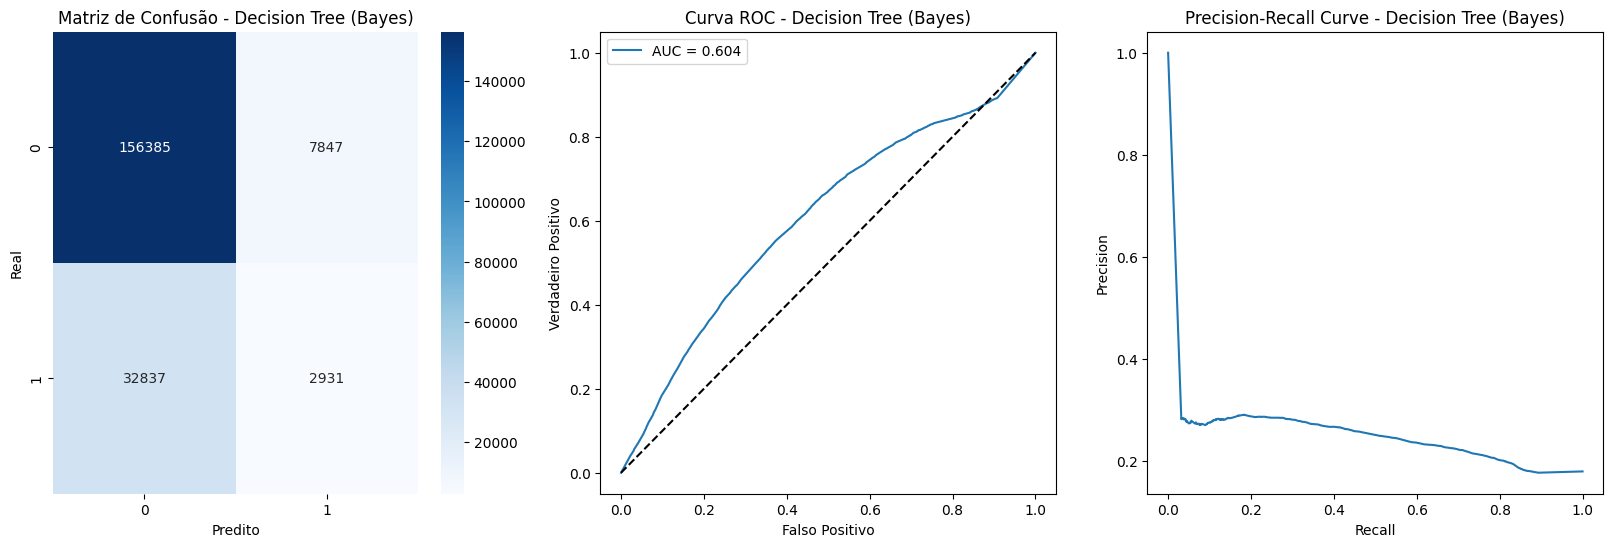

In [124]:
avaliar_modelo(bayes_dt.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test, nome='Decision Tree (Bayes)')

##### Optuna
    é um dos frameworks mais modernos para hyperparameter tuning, super flexível e fácil de usar.
    Ele funciona diferente: você define uma função de objetivo, e o Optuna faz os testes.

In [125]:
def objective_dt(trial):
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    score = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='f1').mean()
    return score

study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective_dt, n_trials=10)
print("Optuna DT:", study_dt.best_params)
best_dt_optuna = DecisionTreeClassifier(**study_dt.best_params, random_state=42)
best_dt_optuna.fit(X_train_scaled, y_train)

[I 2025-07-14 19:39:01,881] A new study created in memory with name: no-name-bb5156b4-0a71-46ab-8d37-018c96d8233f
[I 2025-07-14 19:39:15,767] Trial 0 finished with value: 0.0003493248734452504 and parameters: {'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.0003493248734452504.
[I 2025-07-14 19:39:46,742] Trial 1 finished with value: 0.05388691143304187 and parameters: {'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.05388691143304187.
[I 2025-07-14 19:39:57,682] Trial 2 finished with value: 0.0 and parameters: {'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.05388691143304187.
[I 2025-07-14 19:40:16,442] Trial 3 finished with value: 0.007871423395611135 and parameters: {'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.05388691143304187.
[I 2025-07-14 19:40:49,252] Trial 4 finished with value: 0.064538411

Optuna DT: {'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 3}


FileNotFoundError: [Errno 2] No such file or directory: '/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/utils/_repr_html/estimator.js'

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/utils/_repr_html/estimator.js'

DecisionTreeClassifier(max_depth=18, min_samples_leaf=3, min_samples_split=5,
                       random_state=42)


Decision Tree (Optuna)
              precision    recall  f1-score   support

           0      0.826     0.958     0.887    164232
           1      0.279     0.074     0.117     35768

    accuracy                          0.800    200000
   macro avg      0.552     0.516     0.502    200000
weighted avg      0.728     0.800     0.750    200000



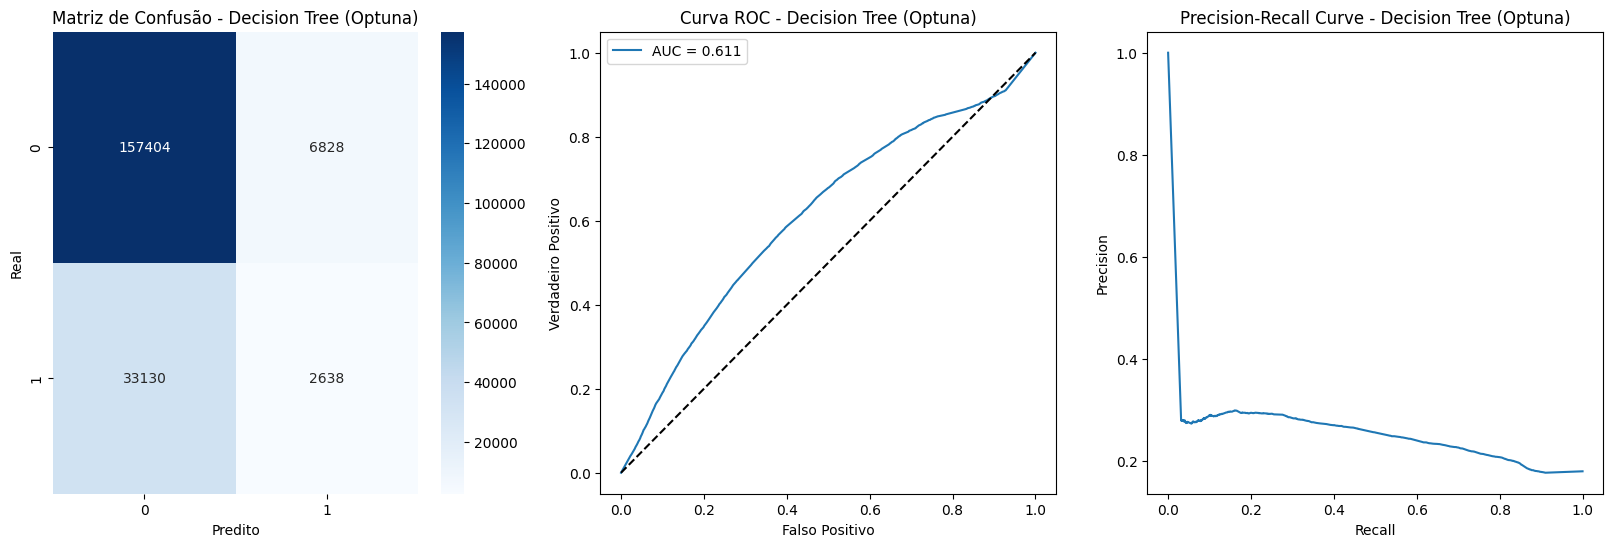

In [126]:
avaliar_modelo(best_dt_optuna, X_train_scaled, X_test_scaled, y_train, y_test, nome='Decision Tree (Optuna)')

### K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)


KNN
              precision    recall  f1-score   support

           0      0.824     0.960     0.887    164232
           1      0.243     0.059     0.095     35768

    accuracy                          0.799    200000
   macro avg      0.534     0.509     0.491    200000
weighted avg      0.720     0.799     0.745    200000



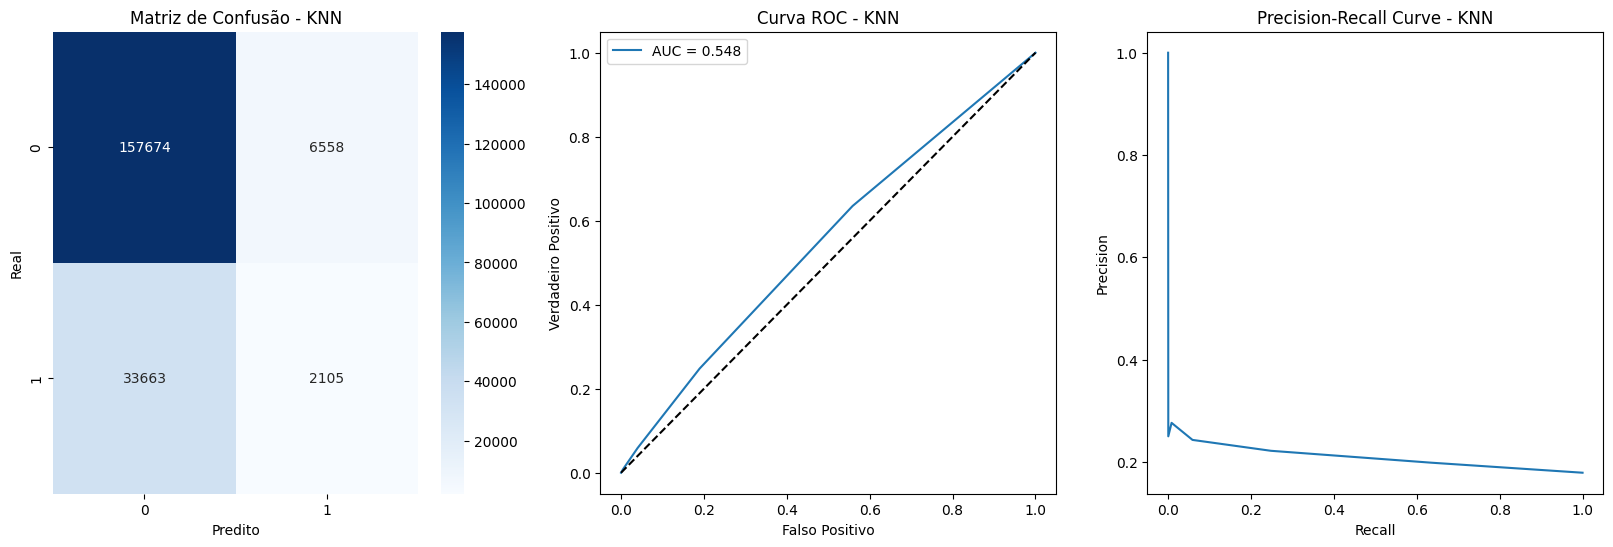

In [103]:
avaliar_modelo(knn_model, X_train_scaled, X_test_scaled, y_train, y_test, nome='KNN')

#### Hiperparamtros

##### GridSearchCV
    Testa todas as combinações de parâmetros que você definir.

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 10, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] # 1=Manhattan, 2=Euclidiana
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train)
print("GridSearchCV KNN:", grid_knn.best_params_)

In [ ]:
avaliar_modelo(grid_knn.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test, nome='KNN (Grid)')

##### RandomizedSearchCV
    Testa combinações aleatórias dos parâmetros (mais rápido quando tem muitas opções).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist_knn = {
    'n_neighbors': [3, 5, 10, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
rnd_knn = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_dist_knn,
    n_iter=6, cv=3, scoring='f1', n_jobs=-1
)
rnd_knn.fit(X_train_scaled, y_train)
print("RandomizedSearchCV KNN:", rnd_knn.best_params_)

In [ ]:
avaliar_modelo(rnd_knn.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test, nome='KNN (Random)')

##### Otimização bayesiana
    A otimização bayesiana é uma técnica baseada no teorema de Bayes, que descreve a probabilidade de ocorrência de um evento relacionado ao conhecimento atual

In [ ]:
from skopt import BayesSearchCV

search_spaces_knn = {
    'n_neighbors': (3, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
bayes_knn = BayesSearchCV(
    KNeighborsClassifier(),
    search_spaces=search_spaces_knn,
    n_iter=8, cv=3, scoring='f1', n_jobs=-1, random_state=42
)
bayes_knn.fit(X_train_scaled, y_train)
print("BayesSearchCV KNN:", bayes_knn.best_params_)


In [ ]:
avaliar_modelo(bayes_knn.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test, nome='KNN (Bayes)')

##### Optuna
    é um dos frameworks mais modernos para hyperparameter tuning, super flexível e fácil de usar.
    Ele funciona diferente: você define uma função de objetivo, e o Optuna faz os testes.

In [ ]:
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 3, 20)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    p = trial.suggest_int('p', 1, 2)
    model = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        p=p
    )
    score = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='f1').mean()
    return score

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=8)
print("Optuna KNN:", study_knn.best_params)
best_knn_optuna = KNeighborsClassifier(**study_knn.best_params)
best_knn_optuna.fit(X_train_scaled, y_train)

In [ ]:
avaliar_modelo(best_knn_optuna, X_train_scaled, X_test_scaled, y_train, y_test, nome='KNN (Optuna)')

## HiperParametros e Tunnings
    Hiperparâmetros são atributos que controlam o treinamento do modelo de machine learning: com eles podemos tornar o modelo mais preparado para resolver um determinado problema da vida real. Fazendo a comparação com um carro, podemos associar os  parâmetros com o motor e a gasolina e os hiperparâmetros são como a direção, o sensor de velocidade e retrovisores. O carro funciona somente com motor e gasolina. Contudo, sem os outros equipamentos, podemos levar o veículo a um desastre porque não teríamos o controle dele.
[Fonte](https://blog.dsbrigade.com/hiperparametros-por-que-sao-importantes/)

### Random forest
    n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features

In [85]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### XGBoost/LightGBM/CatBoost
    n_estimators, max_depth, learning_rate, subsample, colsample_bytree

### KNN
    n_neighbors, weights, p

### Decision Tree
    max_depth, min_samples_split, min_samples_leaf

### Logistic Regression
    C (regularização), penalty

In [85]:
print(1)

1
